<center><br><font size=10>Final Project: </font><br>
<font size=6>Introduction to Machine Learning</font>
<br><br>
<b>Digital Sciences for High-Tech</b>
<br><br>
<b>Author</b>: Hodaya Hadad - group number 19
<br><i>Spring 2024</i></center>

<a class="anchor" id="0"></a>
## **Table of Contents** 

1.	[Exploratory Data Analysis](#1) <br>
2.	[Preprocessing](#2) <br>
3.	[Modeling](#3)
4.	[Evaluation](#4)
5.	[Deployment/Prediction](#5)
6.	[Self-Learning](#6)
7.	[Pipeline ](#7)

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, LearningCurveDisplay
from sklearn.metrics import auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency, skew

from typing import List, Dict
%matplotlib inline

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
start_total = time.perf_counter()

This project aims to develop a machine learning model to classify whether job applicants will be hired (label = 1) or not (label = 0) based on various features from their profiles.

## 1. Exploratory Data Analysis (EDA)<a class="anchor" id="1"></a>

[Table of Contents](#0)

In this section, we will gain insights into the data which will help us make better decisions for the next steps.<br>
It involves analyzing and understanding the data before applying any ML algorithms.

### 1.1 Import and Inspect the Data

In this section, we will load the dataset and conduct an initial inspection to understand its structure and contents.<br>

In [3]:
# Import Train Data Features into df_train
df_train = pd.read_csv("train.csv")
print("The training data has", f"{df_train.shape[0]:,}", "observations and", df_train.shape[1], "features (x) that includes 1 feature of label (y)." )

The training data has 55,462 observations and 17 features (x) that includes 1 feature of label (y).


Let's see information about the DataFrame including the columns data types and count of non-null values.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55462 entries, 0 to 55461
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55462 non-null  int64  
 1   worked_in_the_past   53697 non-null  object 
 2   age_group            52922 non-null  object 
 3   disability           51781 non-null  object 
 4   is_dev               53372 non-null  object 
 5   education            52446 non-null  object 
 6   sex                  52234 non-null  object 
 7   mental_issues        53047 non-null  object 
 8   years_of_experience  52898 non-null  float64
 9   A                    53327 non-null  float64
 10  B                    51927 non-null  float64
 11  C                    52460 non-null  object 
 12  D                    52843 non-null  float64
 13  country              53443 non-null  object 
 14  prev_salary          52798 non-null  float64
 15  stack_experience     41420 non-null 

In [5]:
# Show first 5 rows of the train dataset
df_train.head()

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,T,young,No,developer,NaN,Male,No,13.0,-1.093080,1.0,aa,180.984266,NaN,67104.0,Bash/Shell;Java;JavaScript;PowerShell;Python;T...,1
1,38314,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,7.0,rhz,180.677533,United States of America,101000.0,Bash/Shell;JavaScript;PowerShell;Python;Docker...,0
2,5209,T,old,No,developer,other,Male,Yes,25.0,1.727255,15.0,aa,177.746162,United States of America,70000.0,Bash/Shell;HTML/CSS;Java;JavaScript;PHP;SQL;Gi...,0
3,54165,T,young,NaN,developer,other,Male,No,10.0,17.804302,7.0,aa,176.952584,Spain,40956.0,C#;Dart;Delphi;Kotlin;SQL;VBA;Docker;Unity 3D;...,0
4,42213,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,4.0,hr,179.393259,Canada,101509.0,Assembly;Bash/Shell;C++;PowerShell;Python;Rust,0


### 1.2 Detailed Data Summary

In this section We will summarize the dataset and calculate statistics, covering both numeric and string columns as well as the count of unique values in each column. This will help us get a basic understanding of the data. 

In [6]:
# Summary of numeric-typed columns
df_train.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,ID,years_of_experience,A,B,D,prev_salary,label
count,55462.00,52898.00,53327.00,51927.00,52843.00,52798.00,55462.00
mean,36709.78,14.21,4.00,9.08,179.58,67800.07,0.54
std,21205.95,9.39,6.39,7.97,1.09,49584.00,0.50
min,0.00,0.00,-21.64,0.00,175.08,1.00,0.00
25%,18388.25,7.00,-0.36,3.00,178.84,28800.00,0.00
50%,36699.50,12.00,3.61,7.00,179.58,57660.00,1.00
75%,55049.75,20.00,7.85,12.00,180.32,95979.00,1.00
max,73461.00,50.00,55.50,50.00,184.15,224000.00,1.00


In [7]:
# Summary of non-numerical features
# Returns count of values, unique values, top, and frequency of occurrence.
df_train.describe(include = ['O'])

,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,C,country,stack_experience
count,53697,52922,51781,53372,52446,52234,53047,52460,53443,41420
unique,2,2,2,2,5,3,2,7,170,39925
top,T,young,No,developer,BA/BSc,Male,No,aa,United States of America,Python
freq,47361,34545,50281,49055,26693,48777,41107,21082,10690,40


In [8]:
# Number of unique values in each column
df_train.apply(pd.Series.nunique, axis = 0)

ID                     55462
worked_in_the_past         2
age_group                  2
disability                 2
is_dev                     2
education                  5
sex                        3
mental_issues              2
years_of_experience       51
A                      53327
B                         51
C                          7
D                      52843
country                  170
prev_salary            10085
stack_experience       39925
label                      2
dtype: int64

This helps us notice a few points: 
- Missing values: Variables with count that is lower than 55,462 have missing values (count indicates the number of not-empty values).
- `ID` feature is unique across the dataset.
- Negative values of `A`, we don't know the meaning of this feature so we'll leave it that way.
- Possible outliers values in feature `prev_salary`.
- Categorical variables: Most of the categorical variables have a relatively small number of unique entries. 
- Categorical variables with two classes: `worked_in_the_past`,`age_group`, `disability`, `is_dev`, `mental_issues`.
- `education` is categorized to 5 different values, as indicates by unique.
- `sex` is categorized to 3 different values.
- `C` is categorized to 7 different values.
- `country` is categorized to 170 different values.

Let's check if the dataset have duplicated observations.

In [9]:
print('Number of duplicated data : ', len(df_train[df_train.duplicated()]))

Number of duplicated data :  0


In [10]:
# lists of the features by data types (except 'label')
numerical_cols = ['ID', 'years_of_experience', 'A', 'B', 'D', 'prev_salary']
categorical_cols = ['worked_in_the_past','age_group','disability','is_dev', 'education', 'sex','mental_issues','C','country','stack_experience']

### 1.3 Features Distribution

This section will analyze the distribution of both numeric and categorical features.

**Numeric Features**<br>
Numerical Features = ['ID', 'years_of_experience', 'A', 'B', 'D', 'prev_salary'] <br>


First we'll use box plot, which displaying the distribution of a data set based on its five-number summary of data points: the “minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum".<br>
Boxplots can tell us about data outliers and what their values are. They can also tell us if the data is symmetrical, how tightly the data is grouped and if and how the data is skewed.<br>
We will look for symmetry. Severe skewness and/or outliers are indications of non-normality.

In [11]:
# Set label as type category
TARGET = 'label'
TARGET_CAT = 'label_cat'
df_train[TARGET_CAT] = df_train[TARGET].astype('category')
# Set the number of columns and rows in the plot grid
num_cols = 3
num_rows = len(numerical_cols) // num_cols

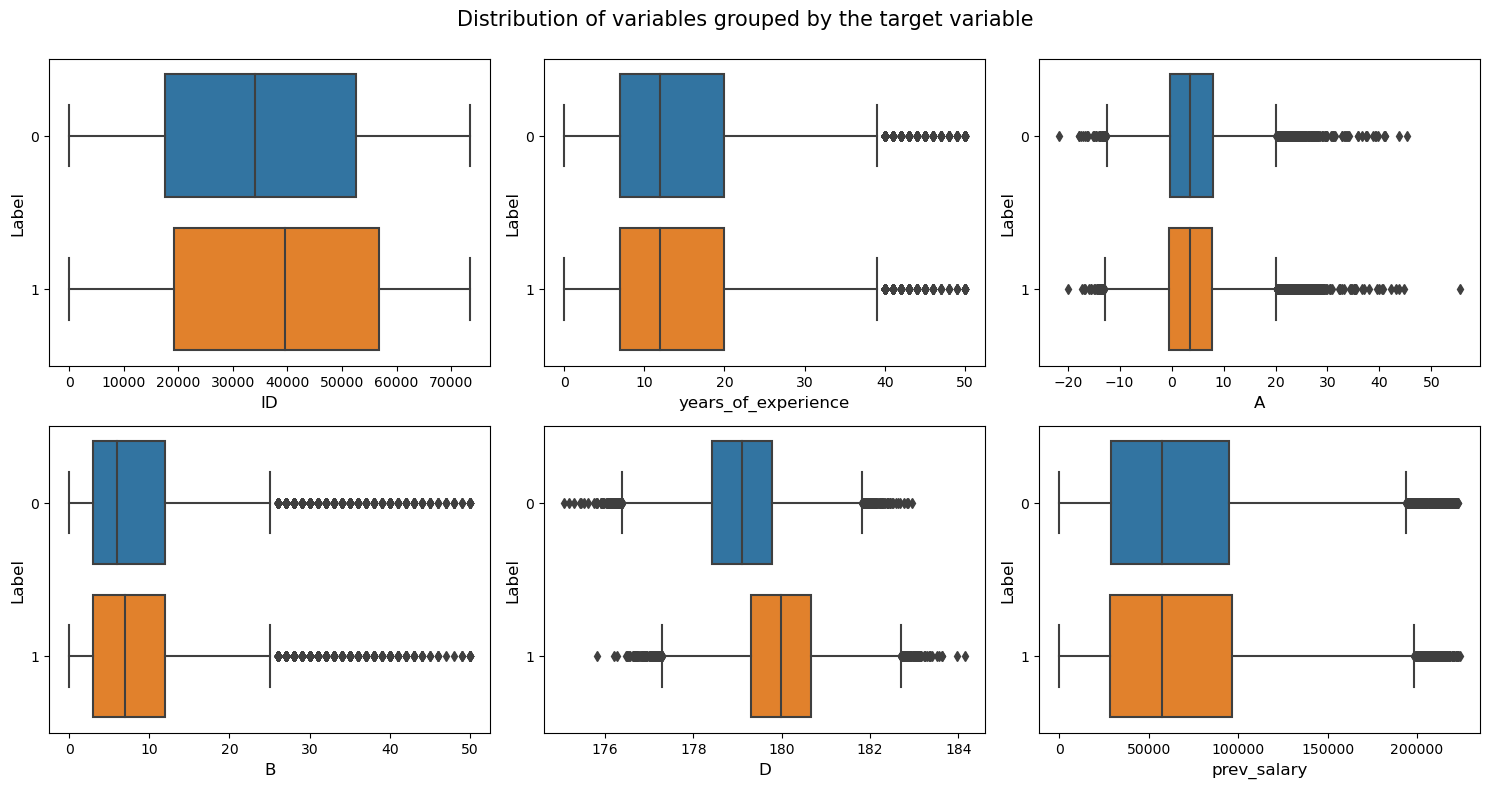

In [12]:
# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column and plot the histogram or density plot
for i, column in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(data=df_train, x=column, y=TARGET_CAT, ax=axes[i])
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Label', fontsize=12)

# Adjust spacing between subplots
fig.suptitle('Distribution of variables grouped by the target variable', fontsize=15)
fig.tight_layout(rect=[0, 0, 1, 0.98])
# Show the plot
plt.show()

Insights from the Box plots:

As shown in these box plots, in feature ID the distribution of data is normal.<br>
In other features, we see some out-of-range points:
1. Years of experience, out of range points are 40 to 50 years, which are reasonable so that is not noise.
2. A, B, D has out of range points, we don't know the meaning of these variables so it's hard to tell wether it's noise or not.
3. Previous salary, it could be any amount, and all of them are reasonable, so they can't be noises.

Next, we will use histogram plot.
Histogram shows how the data is spread out. It uses bars to show how many applicants have certain ranges of the variables.<br>
If we want to determine about normality, we will Look for a “bell-shape”. Severe skewness and/or outliers are indications of non-normality.<br>
In addition, we define kde = true. Kernel Density Estimate (KDE): This is like a smooth line added to the histogram. It helps to see the shape of the data distribution more clearly, making it easier to spot patterns.

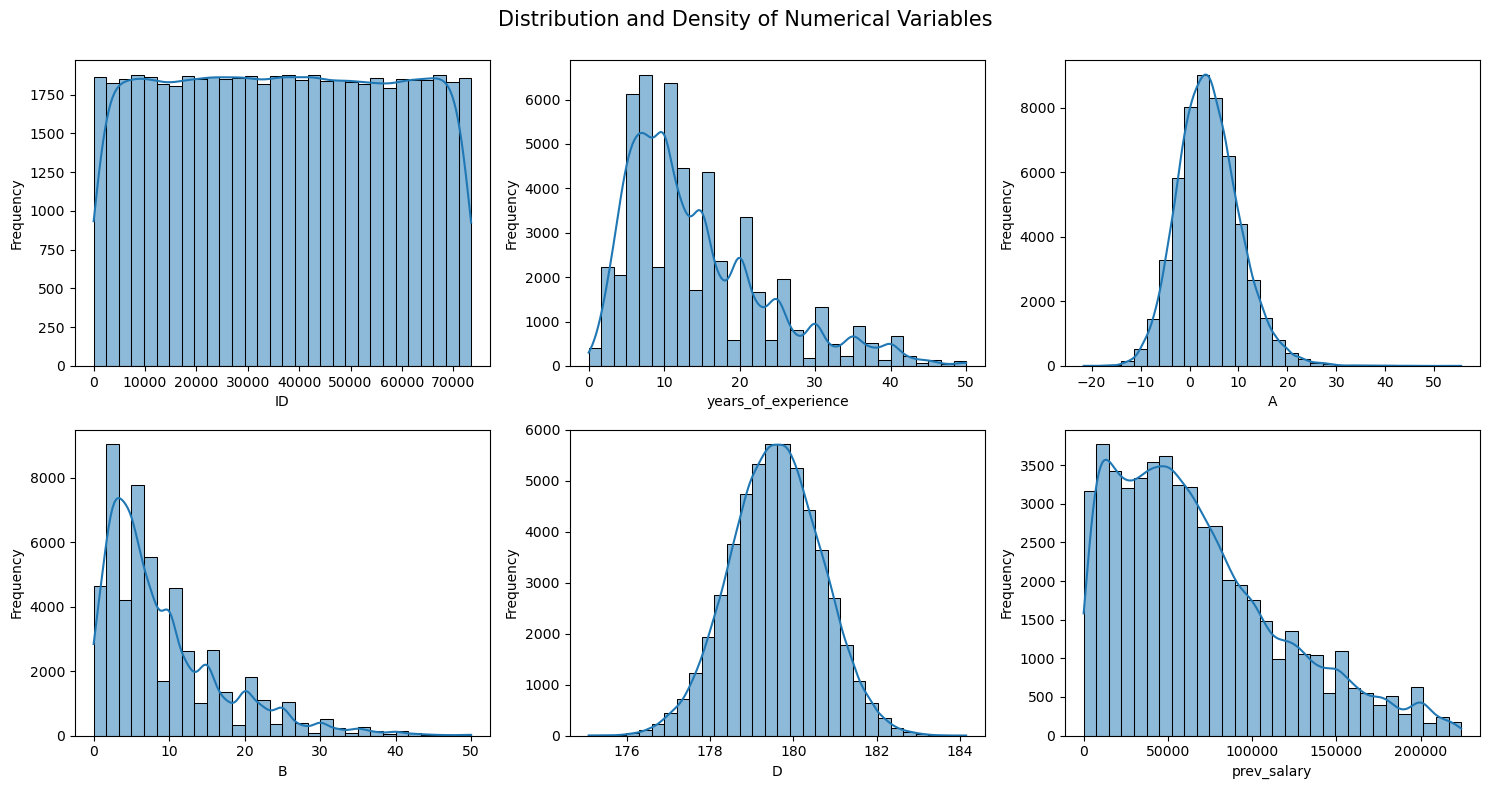

In [13]:
# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column and plot the histogram or density plot
for i, column in enumerate(['ID', 'years_of_experience', 'A', 'B', 'D', 'prev_salary']):
    ax = axes[i]
    sns.histplot(df_train[column], ax=ax, bins=30, kde=True)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

fig.suptitle('Distribution and Density of Numerical Variables', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()

Insights from the Histograms:
- `ID`: has clear violation of normality.
- `years_of_experience`: There is a indication that the data are right-skewed with some strong outliers. The assumption of normality
is clearly violated.
- `A`: Although the histogram is not perfectly symmetric and bell-shaped, there is no clear violation of normality.
- `B`: There is a indication that the data are right-skewed. The assumption of normality is clearly violated.
- `D`: There is a clear bell-shape, indicate for normality.
- `prev_salary`: Has right-skewed distribution,where the tail extends towards the higher values. Income distributions often show right-skew due to a few high-income earners. <br>
  Skewed data can affect predictive modeling performance. Transforming skewed data (e.g., log transformation) can improve model accuracy by reducing the impact of extreme values.

**Categorical Features**<br>
All categorical features = ['worked_in_the_past', 'age_group', 'disability', 'is_dev', 'education', 'sex', 'mental_issues', 'C', 'country', 'stack_experience']<br>

First, we will visualize the distributions of the two classes features with count plot. Count plot is a type of bar plot that shows the count of observations in each categorical value. <br>

In [14]:
two_class_features = ['is_dev', 'worked_in_the_past', 'age_group', 'disability', 'mental_issues']

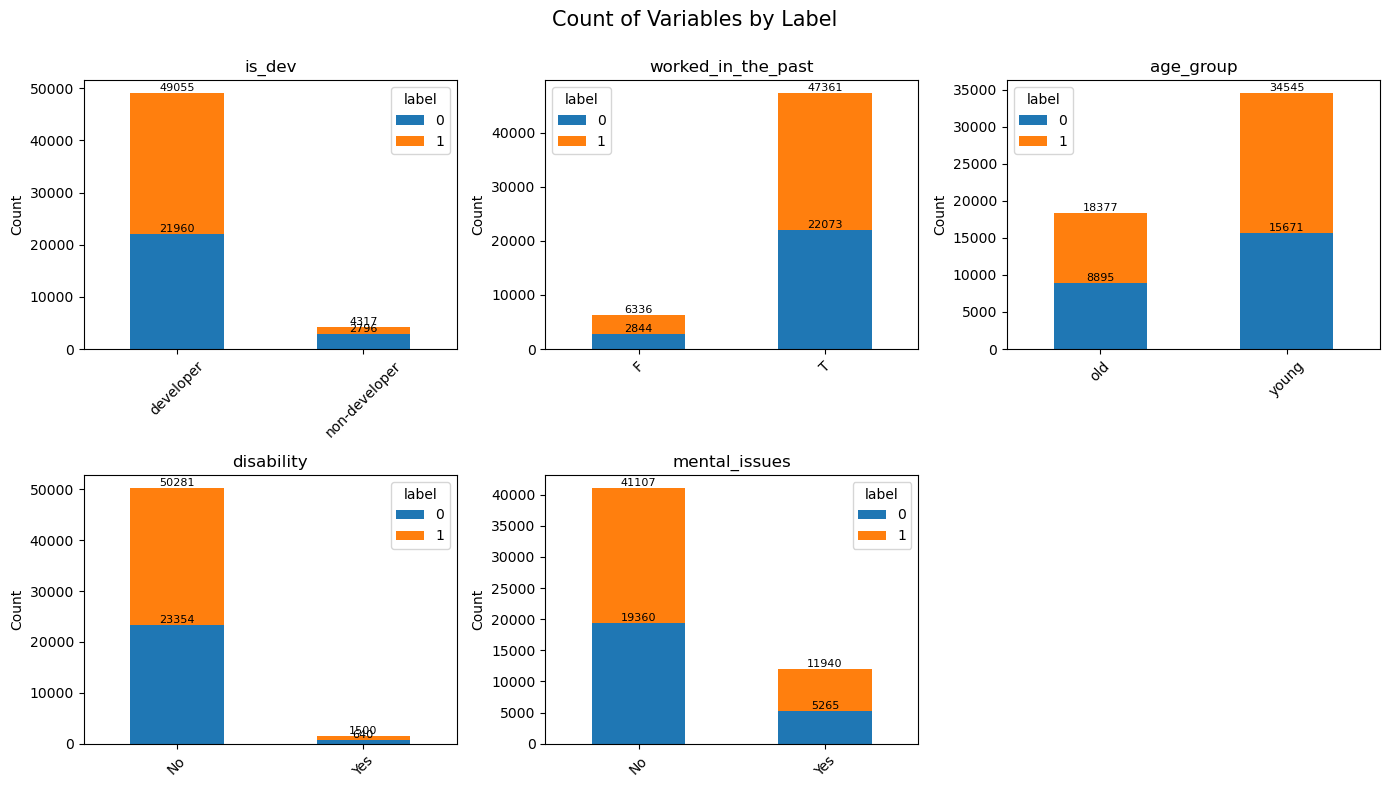

In [16]:
# Create a figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

for i, feature in enumerate(two_class_features):
    ax = axes[i // 3, i % 3]
    dv_counts = pd.crosstab(df_train[feature], df_train['label'])
    bars = dv_counts.plot.bar(stacked=True, ax=ax)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('Count')
    ax.set_title(feature)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    # Add count values on the bars
    for container in bars.containers:
        ax.bar_label(container, label_type='edge', fontsize=8, color='black')

# If there are empty subplots, turn them off
for j in range(len(two_class_features), 6):
    fig.delaxes(axes[j // 3, j % 3])

fig.suptitle('Count of Variables by Label', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


Next, we have 5 features that has more than two classes: 'education', 'sex', 'C', 'country', 'stack_experience'.<br>
For these features we will use horizontal bar plot in order to visualize the frequency of each category. Categories that stand out as having very low counts might be outliers.<br>

`stack_experience` has a lot of categories, we handle it separately in section 2.2.

In [17]:
# Function to add value labels to horizontal bar plot
def add_labels(y, counts):
    for i in range(len(y)):
        plt.text(counts[i] + 0.1, i, counts[i], va='bottom', ha='left')

`C`

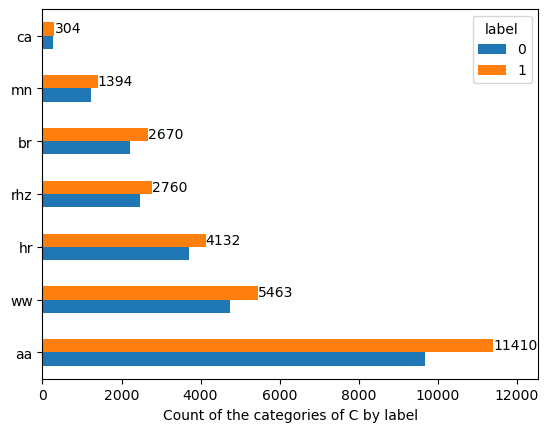

In [18]:
# Count of the categories of 'C' by label
c_counts = pd.crosstab(df_train['C'], df_train['label'])
# Sort by categories with label = 1
c_counts = c_counts.sort_values(1, ascending=False)
# Plot horizontal bar chart
c_counts.plot.barh()
# Add x-label and remove y-label
plt.xlabel('Count of the categories of C by label')
plt.ylabel('')
# Adjust xlim to ensure labels fit inside the bars
plt.xlim(right=c_counts[1].max() * 1.1)
# Calling the function to add value labels for 'label' = 1
add_labels(c_counts.index, c_counts[1].values)
plt.show()

`education`

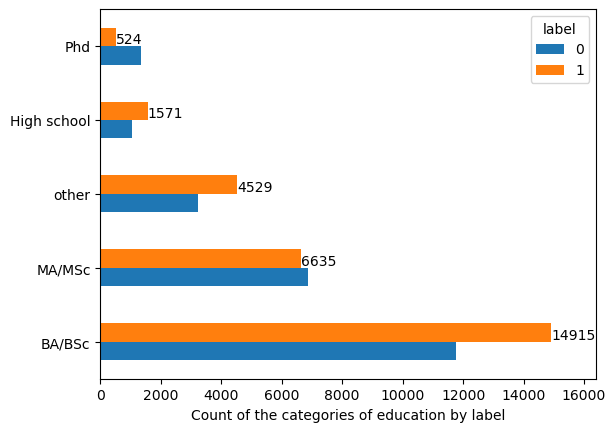

In [19]:
# count of the categories of 'education' by label
educ_counts = pd.crosstab(df_train['education'], df_train['label'])
# sort by categories with label = 1
educ_counts = educ_counts.sort_values(1, ascending=False)
# Plot horizontal bar chart
educ_counts.plot.barh()
# Add x-label and remove y-label
plt.xlabel('Count of the categories of education by label')
plt.ylabel('')
# Adjust xlim to ensure labels fit inside the bars
plt.xlim(right=educ_counts[1].max() * 1.1)
# Calling the function to add value labels for 'label' = 1
add_labels(educ_counts.index, educ_counts[1].values)
plt.show()

`sex`

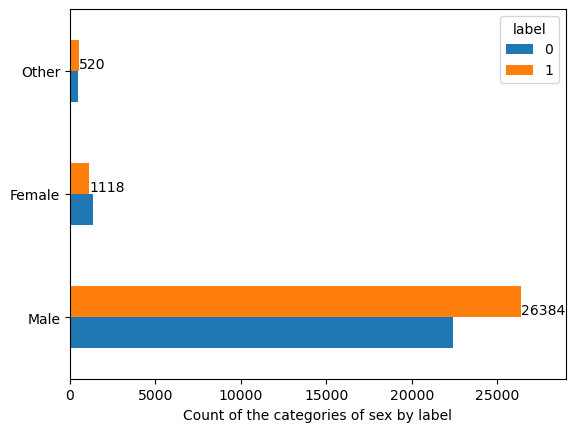

In [20]:
# count of the categories of 'sex' by label
sex_counts = pd.crosstab(df_train['sex'], df_train['label'])
# sort by categories with label = 1
sex_counts = sex_counts.sort_values(1, ascending=False)
# Plot horizontal bar chart
sex_counts.plot.barh()
# Add x-label and remove y-label
plt.xlabel('Count of the categories of sex by label')
plt.ylabel('')
# Adjust xlim to ensure labels fit inside the bars
plt.xlim(right=sex_counts[1].max() * 1.1)
# Calling the function to add value labels for 'label' = 1
add_labels(sex_counts.index, sex_counts[1].values)
plt.show()

`country`

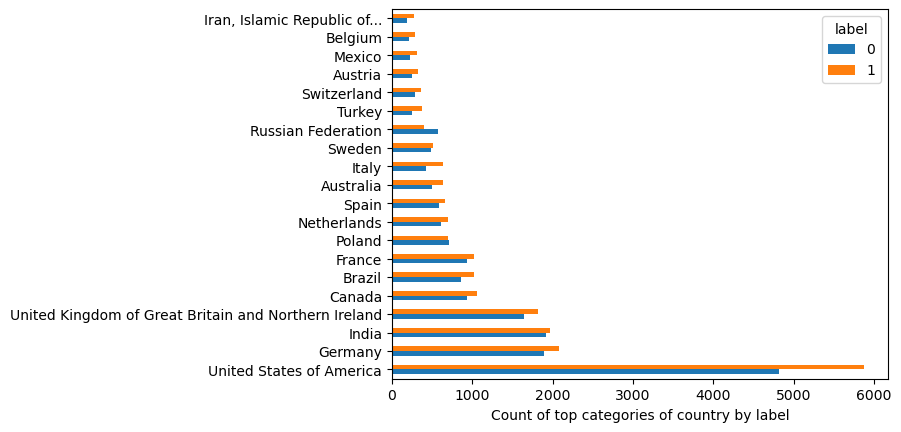

In [21]:
# count of the categories of 'country' by label
country_counts = pd.crosstab(df_train['country'], df_train['label'])
# count of the top 20 categories with label = 1
sorted_country = country_counts.sort_values(1, ascending=False).head(20)
# Plot horizontal bar chart
sorted_country.plot.barh()
# Add x-label
plt.xlabel('Count of top categories of country by label')
plt.ylabel('')
plt.show()

In [22]:
# Count of the categories of 'country' by label
country_counts = pd.crosstab(df_train['country'], df_train['label'])
# Calculate the percentage of label 1 for each country
country_counts['hired in %'] = (country_counts[1] / country_counts.sum(axis=1)) * 100
# Round the percentage values to two digits after the decimal point
country_counts['hired in %'] = country_counts['hired in %'].round(2)
# Count of the top 50 countries with label = 1
top_counts = country_counts.sort_values(1, ascending=False).head(30)
top_counts

label,0,1,hired in %
country,,,
United States of America,4813,5877,54.98
Germany,1891,2076,52.33
India,1919,1972,50.68
United Kingdom of Great Britain and Northern Ireland,1646,1816,52.46
Canada,934,1054,53.02
Brazil,863,1026,54.31
France,932,1018,52.21
Poland,709,697,49.57
Netherlands,606,692,53.31


The `country` feature shows little variation in the percentage of hired people across the top countries (around 50%), it may indicate that the country feature does not provide significant discriminatory power for predicting the label.<br>

We can explore the relationship between the country feature and the label using other techniques.<br>
One approach is with **Chi-Square Test**, which assess the association between the categorical `country` variable and the binary `label`.

In [23]:
# Create a contingency table
contingency_table = pd.crosstab(df_train['country'], df_train['label'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Statistic: 527.6219945158559
P-Value: 1.6325730219242943e-38


The results from the chi-square test indicate a very high chi-square statistic (527.622) and an extremely low p-value (1.63e-38). <br>
The extremely low p-value suggests that there is a statistically significant association between the `country` variable and the `label`. In other words, the distribution of the labels is not independent of the countries; some countries are associated with different probabilities of the label.

- Chi-Square Statistic: This is a measure of how much the observed counts differ from the expected counts under the null hypothesis of independence. A high value indicates a large difference.
- P-Value: This indicates the probability of observing such a high chi-square statistic under the null hypothesis. A very low p-value (typically below 0.05) suggests that the observed differences are statistically significant and not due to random chance.<br>

As a result to the above, we will keep the `country` feature and deal with it in Part 2.

We'll remove the 'label_cat' column that we've created for the visualization. 

In [24]:
df_train = df_train.drop(['label_cat'], axis = 1)

### 1.4 Target Feature Distribution

In a supervised learning problem, we want to examine the distribution of our target variable.<br>
This helps us understand its balance, potential biases, and whether any further preprocessing steps are necessary.
As we saw from the count plots in section 1.3, the `label` feature has an unequal number of observations between the classes.

In [25]:
print("The classes Distribution is:\n", df_train['label'].value_counts(), sep = '')

The classes Distribution is:
1    29740
0    25722
Name: label, dtype: int64


The situation above called imbalanced classification problem, meaning the class distribution is not equal and is skewed.<br>
This is important because we want to train a machine learning model that works well for all classes, assuming we have a balanced dataset.<br>
The majority is class 1 with 53.6% of the observed workers got hired and the minority is class 0 with 46.4% workers that was not hired.

In terms of a ratio, the imbalanced is about 6 to 7 (6:7). A slight imbalance is often not a big issue and can be treated like a normal classification problem, but sometimes it requires adjustments. We'll discuss how to handle imbalanced datasets later in section 2.10.

### 1.5 Visualize Relationships 

Explore the relationships between different variables in the dataset.<br>
This step helps us understand how variables interact and potentially uncover correlations and important patterns.

We will use Pearson Correlation Matrix, which measures the linear relationship between two continuous features.

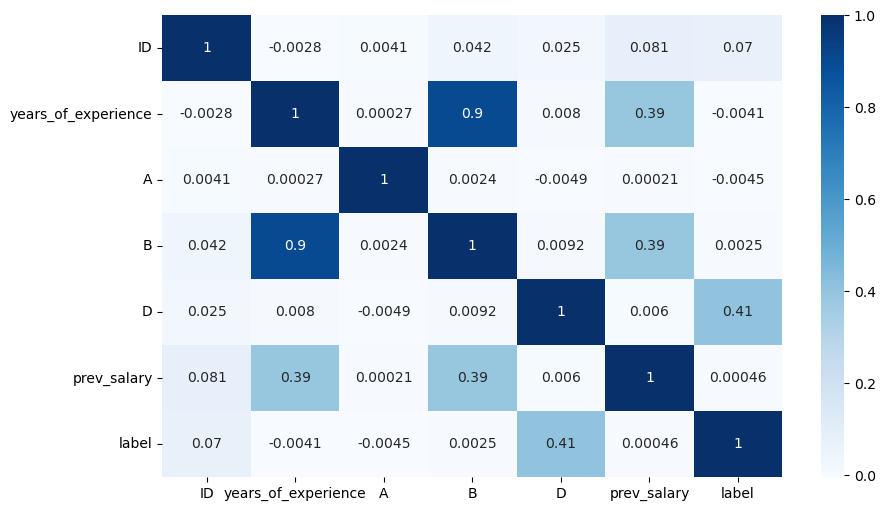

In [26]:
# Pearson correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(method='pearson', numeric_only = True),
            xticklabels = df_train.corr(numeric_only = True).columns,
            yticklabels = df_train.corr(numeric_only = True).columns, annot=True,
            cmap='Blues')
plt.show()

Insights from Pearson Correlation Matrix:
- `years_of_experience` and `B` features has high positive correlation of 0.9.<br>
  It means these features provide redundant information, we might consider removing one if they are highly similar. <br>
  It's interesting because we now understand `B` increases with `years_of_experience`.<br>
  Potential meaning for feature `B` is Seniority. If `B` indicates seniority, it would be consistent with having more experience in a field. Higher levels of seniority typically come with more experience.
- `years_of_experience` and `B` has weak positive correlation with `prev_salary`of 0.39.<br>
  It means that as `years_of_experience` increases, we expect that the `prev_salary` of the workers increase as well. 
- The `label` has the highest correlation with `D` feature (0.41), and the lowest correlation with `A` feature (-0.004).<br>
  Features with little correlation with the target (like `A`) might be less useful and could be candidates for exclusion.<br>
  Features with moderate correlations (like `D`) are more informative and should be carefully considered in the model.

### 1.6 Exploring `stack_experience` Feature

Regarding the is_dev feature, it is unclear whether this classification was determined based on the job role requirements that the applicants applied for or based on how the applicants defined themselves in their CVs.

This distinction is important for accurately interpreting the data and understanding the context behind the classification.

In [27]:
# Filter for developers who have worked in the past
developers_with_past_experience = df_train[(df_train['is_dev'] == 'developer') & (df_train['worked_in_the_past'] == 'T')]

# Count developers with no stack experience
no_stack_experience_developers = developers_with_past_experience[
    (developers_with_past_experience['stack_experience'].isna()) | (developers_with_past_experience['stack_experience'] == '')]
# Number of such developers
count_no_stack_experience = no_stack_experience_developers.shape[0]
print(f"Number of developers with past experience but without skills in stack_experience: {count_no_stack_experience}")

Number of developers with past experience but without skills in stack_experience: 10682


There's a few explanations of the above: 
1. Data Entry Mistake
2. The applicant worked at the past in different role that is not related to programming.

In [28]:
# Count how many stack_experience None or empty values are there, by is_dev
none_stack_experience_counts = df_train[df_train['stack_experience'].isna() | (df_train['stack_experience'] == '')].groupby('is_dev').size().reset_index(name='count')
none_stack_experience_counts

,is_dev,count
0,developer,12424
1,non-developer,1086


In [29]:
# Count how many stack_experience not-None values are there, by is_dev
non_none_stack_experience_counts = df_train[(df_train['stack_experience'].notna()) & (df_train['stack_experience'] != '')].groupby('is_dev').size().reset_index(name='count')
non_none_stack_experience_counts

,is_dev,count
0,developer,36631
1,non-developer,3231


This tells us that there is candidates who categorized into non-developer class, but have values in stack_experience feature, indicating they have programming skills. Considerations we need to take into account:
1. Data Entry Mistake: It's incorrect data entry. This might happen if the field is not properly validated or if there’s confusion about the applicant skills.
2. Irrelevant Skills For Role: Another possibility is that non-developer applicants might have acquired these programming skills through personal projects or past experience but applying for roles where programming skills are not required. This could be an indicator of their broader skill set or potential for transitioning into developer roles.

In [30]:
def technology_label_counts(df):
    # Initialize dictionaries to store counts for label 0 and label 1
    tech_counts_label_0 = {}
    tech_counts_label_1 = {}
    
    # Function to count number of stack technologies and labels
    def count_technologies(stack, label):
        if isinstance(stack, str):
            technologies = stack.split(';')
            for tech in technologies:
                if label == 0:
                    if tech in tech_counts_label_0:
                        tech_counts_label_0[tech] += 1
                    else:
                        tech_counts_label_0[tech] = 1
                elif label == 1:
                    if tech in tech_counts_label_1:
                        tech_counts_label_1[tech] += 1
                    else:
                        tech_counts_label_1[tech] = 1
    
    # Apply count_technologies function to each row
    df.apply(lambda row: count_technologies(row['stack_experience'], row['label']), axis=1)
    
    # Create a DataFrame to display the counts
    tech_counts_df = pd.DataFrame({
        'technology_name': sorted(set(tech_counts_label_0.keys()).union(set(tech_counts_label_1.keys()))),
        'label_1_count': [tech_counts_label_1.get(tech, 0) for tech in sorted(set(tech_counts_label_0.keys()).union(set(tech_counts_label_1.keys())))],
        'label_0_count': [tech_counts_label_0.get(tech, 0) for tech in sorted(set(tech_counts_label_0.keys()).union(set(tech_counts_label_1.keys())))]
    })
    # Sort the DataFrame by total count in descending order
    tech_counts_df['total_count'] = tech_counts_df['label_1_count'] + tech_counts_df['label_0_count']
    tech_counts_df = tech_counts_df.sort_values(by='total_count', ascending=False).reset_index(drop=True)
    return tech_counts_df

In [31]:
# Call the function to get the technology label counts
technology_counts_table = technology_label_counts(df_train)
technology_counts_table.head(40)

,technology_name,label_1_count,label_0_count,total_count
0,JavaScript,19024,8907,27931
1,Docker,13775,8964,22739
2,HTML/CSS,15693,7027,22720
3,SQL,14341,7342,21683
4,Git,10474,9849,20323
5,AWS,10639,7231,17870
6,Python,9389,8126,17515
7,PostgreSQL,10172,6789,16961
8,MySQL,10827,5953,16780
9,TypeScript,13051,2471,15522


---

<a class="anchor" id="2"></a>
## 2. Preprocessing 

[Table of Contents](#0)

In this section, we prepare and transform the data to ensure it is clean, structured, and ready for modeling.

### 2.1 Feature Engineering

This section involves creating new feature to enhance the dataset.

#### 2.1.1 Create Feature `len_of_stack`

We will create a new feature called len_of_stack which indicates for each sample, the number of technologies there is in the stack_experience feature.

In [32]:
# Function to create feature len_of_stack as number of stack technologies
def count_stack_technologies(df):
    # Function to count number of technologies
    def count_technologies(stack):
        if isinstance(stack, str):
            return len(stack.split(';'))
        else:
            return 0
    # Apply count_technologies function to each row
    df['len_of_stack'] = df['stack_experience'].apply(count_technologies)
    return df

In [33]:
# Call the function to add 'len_of_stack' column to train set
df_train = count_stack_technologies(df_train)

#### 2.1.2 Log Transformation on `prev_salary` Feature

Log transformation is useful for features with skewed distribution. As we seen in part A, prev_salary has a right-skewed distribution with a few high values pulling the mean upward. Applying a log transformation can make the data more symmetric and closer to a normal distribution.<br>
Several machine learning algorithms might benefit from log-transformed features due to the transformation’s impact on data distribution and relationships.

In [34]:
# Apply log transformation
df_train['prev_salary'] = np.log(df_train['prev_salary'])
df_train.head()

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label,len_of_stack
0,65168,T,young,No,developer,NaN,Male,No,13.0,-1.093080,1.0,aa,180.984266,NaN,11.113999,Bash/Shell;Java;JavaScript;PowerShell;Python;T...,1,12
1,38314,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,7.0,rhz,180.677533,United States of America,11.522876,Bash/Shell;JavaScript;PowerShell;Python;Docker...,0,7
2,5209,T,old,No,developer,other,Male,Yes,25.0,1.727255,15.0,aa,177.746162,United States of America,11.156251,Bash/Shell;HTML/CSS;Java;JavaScript;PHP;SQL;Gi...,0,12
3,54165,T,young,NaN,developer,other,Male,No,10.0,17.804302,7.0,aa,176.952584,Spain,10.620254,C#;Dart;Delphi;Kotlin;SQL;VBA;Docker;Unity 3D;...,0,17
4,42213,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,4.0,hr,179.393259,Canada,11.527903,Assembly;Bash/Shell;C++;PowerShell;Python;Rust,0,6


### 2.2  Handling String Feature

In this section, we will process and transform string feature `stack_experience` into a suitable format for modeling.
`stack_experience` contain string with the names of the technologies that the applicant has experience in.

In [35]:
# Function to convert stack_experience column to multiple columns
def expand_stack_experience(df, column, prefix='tech_'):
    # Ensure all entries are strings and handle NaNs
    df[column] = df[column].fillna('').astype(str)
    
    # Split the stack_experience column and create a list of all unique technologies
    technologies = set()
    df[column].str.split(';').apply(technologies.update)
    technologies = sorted(technologies)  # Sort for consistent column order
    
    # Initialize columns with zeros, using a prefix to avoid conflicts
    for tech in technologies:
        df[prefix + tech] = 0
    
    # Update the DataFrame with ones where the technology is present
    for idx, row in df.iterrows():
        for tech in row[column].split(';'):
            if tech:
                df.at[idx, prefix + tech] = 1
    
    # Drop the original stack_experience column
    df.drop(columns=[column], inplace=True)
    return df

In [36]:
# Apply expand_stack_experience function to the df_train
df_train = expand_stack_experience(df_train, 'stack_experience')

# remove the column represents Nan values in stack_experience feature
df_train.drop(columns=['tech_'], inplace=True)

df_train # 55462 rows × 133 columns here

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,...,tech_TypeScript,tech_Unity 3D,tech_Unreal Engine,tech_VBA,tech_VMware,tech_Vue.js,tech_Xamarin,tech_Yarn,tech_jQuery,tech_npm
0,65168,T,young,No,developer,NaN,Male,No,13.0,-1.093080,...,1,0,0,0,0,1,0,0,0,1
1,38314,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,...,0,0,0,0,0,0,0,0,0,0
2,5209,T,old,No,developer,other,Male,Yes,25.0,1.727255,...,0,0,0,0,0,0,0,1,0,0
3,54165,T,young,NaN,developer,other,Male,No,10.0,17.804302,...,0,1,0,1,0,0,0,0,0,0
4,42213,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,T,young,No,developer,BA/BSc,Male,No,7.0,6.868416,...,0,0,0,0,0,0,0,0,0,0
55458,57832,T,NaN,NaN,developer,MA/MSc,Male,No,22.0,2.030205,...,0,0,0,0,0,0,0,1,1,1
55459,47358,T,old,No,developer,BA/BSc,Male,No,35.0,1.473015,...,1,0,0,0,0,0,0,0,0,1
55460,36055,T,young,NaN,developer,BA/BSc,Male,No,6.0,-0.883305,...,1,0,0,0,0,0,0,0,0,0


### 2.3 Handling Categorical Features

In this section we will handle categorical features, such as country, sex, education and C through encoding techniques. In Addition, we'll convert categorical features with two classes into binary features (classes of 0 or 1).

In [37]:
# Function to create binary feature for 'usa' and remove the original 'country' feature
def create_usa_feature(df, country_column='country'):
    # Create binary 'usa' feature
    df['usa'] = df[country_column].apply(lambda x: 1 if x == 'United States of America' else 0)
    # Drop the original 'country' column
    df.drop(country_column, axis=1, inplace=True)
    return df

In [38]:
# Apply the function to df_train
df_train = create_usa_feature(df_train) # now 55462 rows × 134 columns

In [39]:
# Function that perform one-hot encoding using Pandas and remove the original feature
def encode_categorical_variables(df, column_name):
    mapped_variables = pd.get_dummies(df[column_name], dtype=int) # Generate dummy variables
    df_encoded = pd.concat((df, mapped_variables), axis=1) # Concatenate the dummy variables with the original DataFrame
    df_encoded = df_encoded.drop([column_name], axis=1) # Drop the original categorical column
    return df_encoded

Removing one of the resulting dummy variables (one category) is typically done to avoid multicollinearity in linear models.

In [40]:
# get dummies variables out of categorical variables - train set
df_train = encode_categorical_variables(df_train, 'sex')
df_train = encode_categorical_variables(df_train, 'education')
df_train = encode_categorical_variables(df_train, 'C')
# Manually drop one class from each categorical variable 
df_train = df_train.drop(['Other'], axis = 1)
df_train = df_train.drop(['other'], axis = 1)
df_train = df_train.drop(['ca'], axis = 1)
# df train has 55462 rows × 143 columns

Now let's convert the two-classes features into binary features.

In [41]:
# Function that maps each two-classes features into classes 1 or 0
def map_binary_features(df):
    # Define the binary mappings
    binary_mappings = {
        'worked_in_the_past': {'T': 1, 'F': 0},
        'age_group': {'young': 1, 'old': 0},
        'disability': {'Yes': 1, 'No': 0},
        'is_dev': {'developer': 1, 'non-developer': 0},
        'mental_issues': {'Yes': 1, 'No': 0}
    }
    
    # Apply the mappings to the DataFrame
    for feature, mapping in binary_mappings.items():
        if feature in df.columns:
            df[feature] = df[feature].map(mapping)
    
    return df

In [42]:
# Map two-classes features into classes 1 or 0
df_train = map_binary_features(df_train)

In [43]:
# Remove and add 'label' column to the end of the data frame
label_col = df_train.pop('label')
df_train['label'] = label_col
df_train # 55462 rows × 142 columns right now

,ID,worked_in_the_past,age_group,disability,is_dev,mental_issues,years_of_experience,A,B,D,...,High school,MA/MSc,Phd,aa,br,hr,mn,rhz,ww,label
0,65168,1.0,1.0,0.0,1.0,0.0,13.0,-1.093080,1.0,180.984266,...,0,0,0,1,0,0,0,0,0,1
1,38314,1.0,1.0,0.0,0.0,1.0,7.0,5.444533,7.0,180.677533,...,0,0,0,0,0,0,0,1,0,0
2,5209,1.0,0.0,0.0,1.0,1.0,25.0,1.727255,15.0,177.746162,...,0,0,0,1,0,0,0,0,0,0
3,54165,1.0,1.0,NaN,1.0,0.0,10.0,17.804302,7.0,176.952584,...,0,0,0,1,0,0,0,0,0,0
4,42213,1.0,1.0,0.0,1.0,0.0,12.0,-8.679091,4.0,179.393259,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,1.0,1.0,0.0,1.0,0.0,7.0,6.868416,2.0,NaN,...,0,0,0,1,0,0,0,0,0,1
55458,57832,1.0,NaN,NaN,1.0,0.0,22.0,2.030205,20.0,178.055004,...,0,1,0,0,0,0,0,0,0,1
55459,47358,1.0,0.0,0.0,1.0,0.0,35.0,1.473015,35.0,182.771752,...,0,0,0,1,0,0,0,0,0,1
55460,36055,1.0,1.0,NaN,1.0,0.0,6.0,-0.883305,3.0,180.147589,...,0,0,0,0,0,0,0,0,1,1


### 2.4 Removing Features

As a conclusion from part A, there are features that need to be removed from the data set and will not take into consideration in our model. 

- `ID` has unique values for every sample in train (and in test) data. It means that this feature does not provide any meaningful information or variation within the dataset. In such cases, it is common to remove the feature from the dataset.<br> 
- `years_of_experience` and `B` has high correlation - so `B` need to be removed as well.

In [44]:
df_train = df_train.drop(['ID', 'B'], axis = 1)
print("The new dimensions of the dataframe is", df_train.shape) # 55462 rows and 140 columns

The new dimensions of the dataframe is (55462, 140)


In [45]:
# update columns list
numerical_cols = ['years_of_experience', 'A', 'D', 'prev_salary','len_of_stack']
categorical_cols = None
binary_cols = ['worked_in_the_past', 'age_group', 'disability', 'is_dev', 'mental_issues']

In [46]:
# Function to find all binary features in the DataFrame excluding specific columns
def find_binary_features(df, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []
    binary_features = [col for col in df.columns if col not in exclude_columns and df[col].nunique() == 2 and set(df[col].unique()).issubset({0, 1})]
    return binary_features

In [47]:
# Apply find_binary_features function to the DataFrame
exclude_columns = ['label']  # Columns to exclude from the binary features list
binary_features = find_binary_features(df_train, exclude_columns)
# add new binary cols to the binary_cols list
binary_cols = list(set(binary_cols + binary_features))

### 2.5 Train-Validation Split

We will split the dataset into training and validation sets to evaluate model performance.<br>
Splitting data before performing preprocessing steps (like handling outliers, missing data, normalization/standardization etc.) helps us avoid data leakage from the validation set into the training process, that could lead to overfitting.

In [48]:
# Separate features and label
X = df_train.drop(columns='label')
y = df_train['label']

# split to train and validation with stratify that keeps equal proportions of labels in train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
# Combining X_train and y_train into a DataFrame with column names
df_train_split = pd.concat([X_train, pd.DataFrame(y_train, columns=[y.name])], axis=1)
df_val_split = pd.concat([X_val, pd.DataFrame(y_val, columns=[y.name])], axis=1)

print("The dimensions of the train data frame is:", df_train_split.shape, "\nThe dimensions of the validation data frame is:", df_val_split.shape)

The dimensions of the train data frame is: (44369, 140) 
The dimensions of the validation data frame is: (11093, 140)


### 2.6 Data Outliers

This section focuses on detecting and handling outliers in the dataset.<br>
I have decided to handle outliers before handling missing data with Imputation. This approach ensures that outliers are addressed first, minimizing their potential impact on the imputation process.

One problem we always want to be on the lookout for is anomalies within the data.<br>
These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements.<br>

#### 2.6.1 Data Outliers in Categorical features

Categories with significantly low or high frequencies compared to other categories can be considered outliers in categorical data.<br>
For example, in the `sex` feature, there is a class named "Other" with few occurrences, and in the `C` feature, there is a class named "ca" with a low count.<br>

As outlined in section 2.3, we have removed the "Other" category from the `sex` feature and the "ca" category from the `C` feature. This decision helps to mitigate multiculinearity and may also address the identified outliers, therefor improving the quality of our data.

Although the `education` feature includes a class "PhD" with a relatively low number of instances, it may still be important for model performance, so we will retain it.

#### 2.6.2 Outliers Detection and Winsorization - Numerical features

The IQR (Interquartile Range) method identifies outliers by analyzing the spread of the data between the first quartile (Q1) and the third quartile (Q3). This method is particularly suitable for detecting outliers in skewed, non-normally distributed features.

In the count_outlier function, I implemented the criteria (Q1 - 1.5 * IQR) to define the lower boundary and (Q3 + 1.5 * IQR) to define the upper boundary. Any value outside of this range is classified as an outlier.

In [49]:
# Function to count outliers
def count_outlier(df):
    outlier_counts = {}
    for col in df.columns:
        q25, q75 = np.percentile(df[col], [25, 75])
        iqr = q75 - q25
        min_val = q25 - (iqr * 1.5)
        max_val = q75 + (iqr * 1.5)
        outlier_counts[col] = len(df[(df[col] < min_val) | (df[col] > max_val)])
    return outlier_counts

In [50]:
# Count Ouliers by IQR
print("Data Ouliers by IQR:", count_outlier(df_train_split[numerical_cols]))

Data Ouliers by IQR: {'years_of_experience': 0, 'A': 0, 'D': 0, 'prev_salary': 0, 'len_of_stack': 220}


To address data outliers issue without losing valuable information, we can use a technique called **Winsorization**.
Winsorization addresses outliers by capping extreme values. It replaces values below the 5th percentile with the 5th percentile value and values above the 95th percentile with the 95th percentile value. This reduces the impact of outliers without removing them from the dataset.

In [51]:
# Apply Winsorization
df_train_split['len_of_stack'] = winsorize(df_train_split['len_of_stack'], limits=(0.05, 0.05))
# After Winsorization
print("After Winsorization:", count_outlier(df_train_split[numerical_cols]))

After Winsorization: {'years_of_experience': 0, 'A': 0, 'D': 0, 'prev_salary': 0, 'len_of_stack': 0}


### 2.7 Missing Data<br>

In this section We will address missing data through imputation techniques.<br>
When it comes time to build machine learning models, we need our data to be without any missing values.

Common approaches:<br> 
1. Delete rows (samples) with missing values.
2. Drop columns with a high percentage of missing values. <br>
The problem with this approach is that it is impossible to know ahead of time if these columns will be helpful to our model.<br>
1. Imputation: fill the missing values in the data.<br>


First we will find out how many missing values there is in each feature.

In [52]:
missing_val_count_by_column = (df_train_split.isnull().sum())
# Percentage of missing values
mis_val_percent = 100 * df_train_split.isnull().sum() / len(df_train)  
# Make a table with the results
mis_val_table = pd.concat([missing_val_count_by_column, mis_val_percent], axis=1)
        
# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
# Print some summary information
print ("There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
print(mis_val_table_ren_columns )

There are 9 columns that have missing values.
                     Missing Values  % of Total Values
disability                     2945                5.3
prev_salary                    2105                3.8
D                              2086                3.8
age_group                      2063                3.7
years_of_experience            2035                3.7
mental_issues                  1905                3.4
A                              1759                3.2
is_dev                         1679                3.0
worked_in_the_past             1420                2.6


Since none of these features have a very high percentage of missing values relative to the total, we will retain these features for now.

Let’s continue with removal of the samples with the missing data.<br>

In [53]:
df_records_dropped = df_train_split.dropna(axis=0, how='any')
df_records_dropped.shape # result is (29209, 140)

(29209, 140)

Dropping rows with missing data reduces the number of samples from 43k to 29k, which is too much differance for reliable modeling. Removing data might not be ideal in this case.

Imputation is a standard technique that generally works well to address missing values.

In [54]:
# Function that performs imputation based on the train dataset
def impute_missing_values(df_train, curr_df, numerical_cols, binary_cols, skewed_threshold=0.5):
    if numerical_cols is not None:
        # Determine skewness for numerical columns in the train set
        skewed_features = df_train[numerical_cols].apply(lambda x: skew(x.dropna()))
        skewed_features = skewed_features[abs(skewed_features) > skewed_threshold].index
        
        # Separate columns into skewed and non-skewed
        non_skewed_cols = [col for col in numerical_cols if col not in skewed_features]
        skewed_cols = [col for col in numerical_cols if col in skewed_features]
        
        # Impute mean for non-skewed features
        if non_skewed_cols:
            imputer_mean = SimpleImputer(strategy='mean')
            imputer_mean.fit(df_train[non_skewed_cols])
            curr_df[non_skewed_cols] = imputer_mean.transform(curr_df[non_skewed_cols])
        
        # Impute median for skewed features
        if skewed_cols:
            imputer_median = SimpleImputer(strategy='median')
            imputer_median.fit(df_train[skewed_cols])
            curr_df[skewed_cols] = imputer_median.transform(curr_df[skewed_cols])

    # Impute missing values in binary columns using the most frequent values from the train set
    if binary_cols is not None:
        imputer_binary = SimpleImputer(strategy='most_frequent')
        imputer_binary.fit(df_train[binary_cols])
        curr_df[binary_cols] = imputer_binary.transform(curr_df[binary_cols])

    return curr_df

The above function uses the SimpleImputer class from scikit-learn to perform imputation.<Br>
For Numerical Columns the strategy is 'mean', it replaces missing values with the mean of the observed values in those columns.<br>
For Binary Columns the strategy is 'most_frequent', it replaces missing values in categorical and binary columns with the most frequent value observed in those columns.

In [55]:
# Imputation on the train data
df_train_processed = impute_missing_values(df_train_split, df_train_split, numerical_cols, binary_cols)
df_train_processed.head() # shape is 44369 rows × 140 columns

,worked_in_the_past,age_group,disability,is_dev,mental_issues,years_of_experience,A,D,prev_salary,len_of_stack,...,High school,MA/MSc,Phd,aa,br,hr,mn,rhz,ww,label
8377,1.0,1.0,0.0,1.0,0.0,12.0,5.247499,178.625913,10.952069,6.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
44164,1.0,1.0,0.0,1.0,0.0,20.0,23.670269,178.925745,12.270352,25.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
40245,1.0,1.0,0.0,1.0,0.0,2.0,6.100979,179.313705,10.098725,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
46581,1.0,0.0,0.0,1.0,0.0,23.0,4.950340,181.147233,11.617285,14.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2743,1.0,1.0,0.0,1.0,1.0,12.0,6.795015,179.101501,11.461632,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


Let's see if there is more missing data in the data frame.

In [56]:
missing_val_count_by_column = (df_train_processed.isnull().sum())
# Percentage of missing values
mis_val_percent = 100 * df_train_processed.isnull().sum() / len(df_train)  
# Make a table with the results
mis_val_table = pd.concat([missing_val_count_by_column, mis_val_percent], axis=1)
        
# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
# Print some summary information
print ("There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

There are 0 columns that have missing values.


### 2.8 Normalization

The data in our dataset is currently not normalized, as indicated in the visualization section. Normalization or standardization is essential for several reasons, particularly when preparing data for classification tasks such as predicting whether someone is hired (1) or not (0).

1. Consistency Across Features: Different features in the dataset may have varying scales and units. Without normalization or standardization, features with larger scales can dominate the learning algorithm, leading to biased model performance.
2. Improved Model Performance: Many machine learning algorithms, especially those relying on distance metrics (like logistic regression, and k-nearest neighbors), perform better when features are scaled to a similar range. Normalization ensures that each feature contributes equally to the model, preventing features with larger ranges from disproportionately influencing the outcome.
3. Equal Feature Contribution: Normalization helps ensure that all features have an equal impact on the model's learning process. In a classification task like predicting hiring status (1 for hired, 0 for not hired), this is crucial. If some features are on different scales, the model may incorrectly prioritize them over others, leading to less effective predictions.

To avoid this problem, we scaled numerical values into a standard range, to have a mean of 0 and a standard deviation of 1.

Binary features, which take values of 0 or 1, are already on a standardized scale. Therefore, additional scaling or normalization for these features is not necessary.

In [57]:
# Function that performs standardization to numerical values in df
def scale_dataframe(df, scaler, fit_scaler=False, label_col='label', binary_cols=[]):
    # Identify the numeric columns, excluding the binary columns and the label column
    numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(binary_cols)
    
    # Drop the label column if it exists in the DataFrame
    if label_col in numeric_cols:
        numeric_cols = numeric_cols.drop(label_col)
    
    # Fit the scaler on the numeric columns if fit_scaler is True
    if fit_scaler:
        scaler.fit(df[numeric_cols])
    
    # Scale the numeric columns using the provided scaler
    scaled_data = scaler.transform(df[numeric_cols])
    df_scaled = df.copy()
    df_scaled[numeric_cols] = scaled_data
    
    return df_scaled

`scale_dataframe` function scales the numerical columns of the DataFrame, excluding binary columns and the label column, using a provided scaler.

In [58]:
# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler on the non-binary columns of the training data
df_train_processed = scale_dataframe(df_train_processed, scaler, fit_scaler=True, label_col='label', binary_cols=binary_cols)
df_train_processed.head()

,worked_in_the_past,age_group,disability,is_dev,mental_issues,years_of_experience,A,D,prev_salary,len_of_stack,...,High school,MA/MSc,Phd,aa,br,hr,mn,rhz,ww,label
8377,1.0,1.0,0.0,1.0,0.0,-0.231586,0.196108,-0.893775,0.183907,-0.489577,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
44164,1.0,1.0,0.0,1.0,0.0,0.641100,3.130261,-0.613237,1.445302,1.955149,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
40245,1.0,1.0,0.0,1.0,0.0,-1.322443,0.332040,-0.250241,-0.632611,1.311800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
46581,1.0,0.0,0.0,1.0,0.0,0.968357,0.148780,1.465302,0.820418,0.539781,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2743,1.0,1.0,0.0,1.0,1.0,-0.231586,0.442578,-0.448791,0.671481,-0.103567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [59]:
# check the mean and std after normalization using summary of numeric-typed columns
df_train_processed.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,worked_in_the_past,age_group,disability,is_dev,mental_issues,years_of_experience,A,D,prev_salary,len_of_stack,...,High school,MA/MSc,Phd,aa,br,hr,mn,rhz,ww,label
count,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00,...,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00,44369.00
mean,0.89,0.67,0.03,0.92,0.22,0.00,0.00,-0.00,-0.00,0.00,...,0.05,0.24,0.03,0.38,0.09,0.14,0.05,0.09,0.18,0.54
std,0.32,0.47,0.16,0.27,0.41,1.00,1.00,1.00,1.00,1.00,...,0.21,0.43,0.18,0.49,0.28,0.35,0.21,0.29,0.39,0.50
min,0.00,0.00,0.00,0.00,0.00,-1.54,-4.09,-4.21,-10.30,-1.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,1.00,0.00,-0.78,-0.67,-0.65,-0.42,-1.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,0.00,1.00,0.00,-0.23,-0.01,0.00,0.20,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,1.00,1.00,0.00,1.00,0.00,0.53,0.58,0.66,0.65,0.67,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,3.91,8.20,4.28,1.49,1.96,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 2.9 Dimensionality Reduction

With 43,222 rows and 141 columns, the dataset has a relatively high dimensionality. 

Potential Issues with High Dimensionality:
1. Curse of Dimensionality: With 141 features, the dataset is approaching a high-dimensional space, which can lead to sparsity. This sparsity can make it difficult for models to learn meaningful patterns, as data points become more spread out.
2.  High dimensionality will lead to build a complex model.
3. Overfitting: If the data has too many features relative to the number of samples, it may fit the training data very well but fail to generalize to unseen data. This is known as overfitting.
4. Increased Computational Cost: More features increase the time and memory required for training and predicting. This can slow down model training and impact resource usage.


Identify if dimensionality is too high:
1. Compute the correlation matrix to identify highly correlated features. High dimensionality might be associated with many redundant features.
2. Perform cross-validation to assess model performance. If there’s a large gap between training and validation performance, it might indicate overfitting due to high dimensionality.
3. Use models like decision trees or random forests to evaluate feature importance. Features with low importance might be redundant or not useful.

We have used option number 1 in section 1.5 and removed feature `B` with high correlation to different feature.
We will show Cross-validation and feature importance in later sections. 

Strategies to Address High Dimensionality:
1. Dimensionality Reduction using PCA: <br>
   Principal Component Analysis (PCA):Reduce the number of features by transforming them into a smaller set of principal components that capture most of the variance in the data.
2. Feature Selection:
   - Filter Methods: Use statistical tests to select features that have the highest correlation with the target variable.
   - Wrapper Methods: Use techniques like Backward selection to iteratively remove features and assess their impact on model performance.
   - Embedded Methods: Use models that perform feature selection as part of the learning process, such as LASSO regression or tree-based methods.

#### 2.9.1 PCA

Principal Component Analysis (PCA) is a strategy to reduce the number of features by transforming them into a smaller set of principal components that capture most of the variance in the data.<br>
We separate the label feature temporarily before conducting other operations.

In [60]:
# Separate label feature temporarily 
label_temp = df_train_processed['label']
feature_matrix = df_train_processed.drop('label', axis=1)

In [61]:
# PCA train set
pca = PCA(n_components = 0.99) # initialize PCA    
pca.fit(feature_matrix) # fit the model with the train data
components = pca.components_ # array of principal components explaining (100*p)% of the variance
print(f'number of components which preserve at least 99% of the variance: {len(components)}')

X_pca = pca.transform(feature_matrix)
print("original shape:   ", feature_matrix.shape)
print("transformed shape:", X_pca.shape)

number of components which preserve at least 99% of the variance: 111
original shape:    (44369, 139)
transformed shape: (44369, 111)


**The Impact of Dimensionality Reduction on Model Performance:**<br>
In our effort to improve model performance and manage the high dimensionality of our dataset, we applied PCA to reduce the number of features. The goal was to maintain at least 99% of the variance while reducing the feature set.<br>
We reduced the dimensionality to 110 components, which preserved at least 99% of the variance in the data.<br>
By reducing the dimensionality from 139 to 110, we managed to retain most of the original information while significantly reducing the feature space. This typically aids in reducing overfitting, improving computational efficiency, and potentially enhancing model performance.<br>

Model interpretability is crucial, especially in applications where understanding the influence of each feature is important. For example, in a model designed to predict whether someone gets hired (hired=1 or not=0), stakeholders need to understand which features contribute to the hiring decision. With PCA, the transformed features lose their direct relationship with the original variables, making it difficult to provide clear insights.

This is the reason why I haven't used PCA in order to reduce dimensionality.

#### 2.9.2 Filter methods: Correlated features (Redundancy)

Since there are 140 features, it is important to account for correlated features which do not add unique information but contribute to the curse of dimensionality. <br>
Presenting a correlation matrix for 140 features can be overwhelming and hard to interpret. Therefore, instead of showing the full correlation matrix, we will identify and display pairs of features with the highest correlations. This approach will help us focus on the most significant redundancies in the dataset.

In [62]:
# Compute the correlation matrix
correlation_matrix = feature_matrix.corr().abs()
# Stack the matrix and sort
sorted_correlations = correlation_matrix.stack().sort_values(ascending=False)
# Remove self-correlations (where row and column names are the same)
sorted_correlations = sorted_correlations[sorted_correlations < 1]
# Display the top 10 highest correlations
top_correlations = sorted_correlations.head(10)
print(top_correlations)

tech_Ruby            tech_Ruby on Rails     0.795492
tech_Ruby on Rails   tech_Ruby              0.795492
len_of_stack         tech_JavaScript        0.708728
tech_JavaScript      len_of_stack           0.708728
tech_C#              tech_ASP.NET Core      0.678906
tech_ASP.NET Core    tech_C#                0.678906
tech_JavaScript      tech_HTML/CSS          0.676836
tech_HTML/CSS        tech_JavaScript        0.676836
age_group            years_of_experience    0.634983
years_of_experience  age_group              0.634983
dtype: float64


Insights from the 10 highest correlations:
- There is high correlation between `tech_Ruby on Rails` and `tech_Ruby`(0.79). For Correlation of about 0.8 or above, it is generally advisable to remove one of the features to reduce redundancy. Therefore, we should consider removing either `tech_Ruby on Rails` or `tech_Ruby`.
- There is moderate correlation between `len_of_stack` and `tech_JavaScript` (0.69), which indicates that applicants with large stack experience, likely to have JavaScript knowledge. These features provide different types of information so it might be beneficial to keep both. 

#### 2.9.2 Filter methods: Label association

Choose the top 25 features correlated with the label.<br>
One way to understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target.<br>

The correlation coefficient give us an idea of possible relationships within the data, and can help us reduce dimensionality.

In [63]:
# Find highest correlations with the target
correlations = df_train_processed.corr(numeric_only = False)['label'].sort_values(ascending=False).head(26)

# Display correlations
print('Correlations:\n', correlations)

Correlations:
 label                        1.000000
tech_Node.js                 0.395862
D                            0.394092
tech_TypeScript              0.384036
len_of_stack                 0.364737
tech_JavaScript              0.296719
tech_MongoDB                 0.296175
tech_npm                     0.290533
tech_Microsoft SQL Server    0.277673
tech_C#                      0.276076
tech_jQuery                  0.273135
tech_HTML/CSS                0.260381
tech_Express                 0.249329
tech_ASP.NET Core            0.239736
tech_Angular                 0.238353
tech_ASP.NET                 0.222015
tech_SQLite                  0.219832
tech_React.js                0.216648
tech_SQL                     0.204676
tech_Java                    0.187540
tech_Microsoft Azure         0.185518
tech_Bash/Shell              0.165716
tech_Yarn                    0.164217
tech_PowerShell              0.164073
tech_Angular.js              0.159638
tech_MySQL                   0.1457

The highest correlations with label are of features `tech_Node.js`, `D`, `tech_TypeScript`.<br>
This means that candidates with Node.js or TypeScript experience are more likely to be hired compared to those without it.
According to the documentation, `D` is an anonymous column. It has positive linear relationship with the label, meaning that as the value of `D` increases, it is more likely that the person was hired.

I considered filtering features based on their correlation with the label. However, this reduction did not improve the final model's performance, so I have decided not to reduce the dataset at this time.

### 2.10 Imbalance Dataset

In [64]:
print("The classes Distribution is:\n", df_train_processed['label'].value_counts(), sep = '')

The classes Distribution is:
1    23792
0    20577
Name: label, dtype: int64


While this isn't a severe imbalance, it could still potentially affect the performance of our machine learning models. Here are some considerations:
1. Resampling Techniques:
   - Oversampling: Increase the number of samples in the minority class (e.g., using SMOTE or ADASYN).<br>
   - Undersampling: Decrease the number of samples in the majority class.
2. Algorithm Choice:<br>
Some algorithms are more robust to class imbalance, such as ensemble methods (e.g., Random Forest, AdaBoost).<br>
Some algorithms allow weighting of classes (e.g., setting class weights in logistic regression etc.). <br>
Some models may not perform well out-of-the-box on imbalanced datasets. for example K-Nearest Neighbors: KNN can be biased towards the majority class.
3. Cross-Validation: We will use stratified cross-validation to ensure that each fold has a similar class distribution as the overall dataset.

### 2.11 Preprocessing Validation Dataset

In this section we apply preprocessing steps to the validation data, following the same procedures used for the training data. This ensures consistency and prevents data leakage.
The preprocessing steps that we apply on the validation set is imputation and standardization, based on train set statics. Data outliers in the validation set ignored in order to mimic unseen test data, in which we need to classify every data point.

In [65]:
df_val_split.head()

,worked_in_the_past,age_group,disability,is_dev,mental_issues,years_of_experience,A,D,prev_salary,len_of_stack,...,High school,MA/MSc,Phd,aa,br,hr,mn,rhz,ww,label
31206,1.0,1.0,0.0,1.0,0.0,16.0,11.080973,178.430239,NaN,10,...,0,0,0,1,0,0,0,0,0,0
53923,1.0,1.0,0.0,1.0,1.0,6.0,-0.326517,180.405374,8.750208,0,...,0,0,0,0,0,1,0,0,0,1
37900,1.0,NaN,1.0,1.0,1.0,16.0,-3.713354,179.994958,11.186558,0,...,0,0,0,0,0,1,0,0,0,1
12486,1.0,1.0,0.0,1.0,0.0,20.0,-2.094044,179.152739,11.112761,17,...,0,0,0,0,1,0,0,0,0,0
1895,1.0,0.0,NaN,1.0,0.0,48.0,3.556269,178.749527,12.003534,4,...,0,0,0,0,0,1,0,0,0,0


In [66]:
# Imputation on the validation data
df_val_split = impute_missing_values(df_train_processed, df_val_split, numerical_cols, binary_cols)

In [67]:
# Use the scale_dataframe function to scale the non-binary columns of the validation data
df_val_split = scale_dataframe(df_val_split, scaler, fit_scaler= False, label_col='label', binary_cols=binary_cols)
df_val_split.head()

,worked_in_the_past,age_group,disability,is_dev,mental_issues,years_of_experience,A,D,prev_salary,len_of_stack,...,High school,MA/MSc,Phd,aa,br,hr,mn,rhz,ww,label
31206,1.0,1.0,0.0,1.0,0.0,0.204757,1.125192,-1.076858,-10.106383,0.025102,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
53923,1.0,1.0,0.0,1.0,1.0,-0.886100,-0.691653,0.771180,-1.922936,-1.261595,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
37900,1.0,1.0,1.0,1.0,1.0,0.204757,-1.231067,0.387174,0.408278,-1.261595,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
12486,1.0,1.0,0.0,1.0,0.0,0.641100,-0.973163,-0.400850,0.337665,0.925791,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1895,1.0,0.0,0.0,1.0,0.0,3.695500,-0.073250,-0.778116,1.189998,-0.746916,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


### 2.12 Preprocessing Test dataset

Consistency in preprocessing between training and test datasets is crucial for accurate and meaningful model evaluation.

In [68]:
df_test = pd.read_csv("test.csv")
# saves ID for result file
ID_values = df_test['ID'] 
# remove features because of the mentioned reasons above
df_test_processed = df_test.drop(['ID','B'], axis = 1)
df_test_processed

,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,C,D,country,prev_salary,stack_experience
0,F,young,No,developer,BA/BSc,Male,No,5.0,9.731222,aa,178.596322,United States of America,60000.0,C#;HTML/CSS;JavaScript;SQL;ASP.NET Core ;Blazo...
1,T,old,No,non-developer,other,Male,No,5.0,-2.482247,aa,179.067238,NaN,27264.0,Bash/Shell;HTML/CSS;JavaScript;Python;Docker;D...
2,T,NaN,No,developer,NaN,Male,No,20.0,7.969130,NaN,180.386346,Greece,NaN,NaN
3,T,old,NaN,developer,BA/BSc,Male,No,20.0,-3.644784,mn,181.329814,NaN,120127.0,Bash/Shell;C;C#;C++;HTML/CSS;Java;JavaScript;K...
4,F,old,No,developer,other,Male,No,40.0,-5.277558,aa,179.758801,United Kingdom of Great Britain and Northern I...,NaN,C#;HTML/CSS;JavaScript;Kotlin;Python;SQL;ASP.N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,T,old,No,developer,High school,Male,No,41.0,-2.756564,ww,179.607237,Canada,117126.0,NaN
17996,T,young,No,developer,MA/MSc,Male,No,18.0,8.432028,ww,179.699470,Germany,59508.0,C;C++;Python;Rust;Ansible;Docker;Kubernetes
17997,T,old,No,developer,other,Male,No,19.0,13.002686,ww,178.233162,Czech Republic,36636.0,Bash/Shell;HTML/CSS;Java;JavaScript;Perl;PHP;P...
17998,NaN,young,No,developer,MA/MSc,NaN,Yes,8.0,-0.477942,aa,179.694004,Poland,NaN,JavaScript;Python;Ansible;Git;Flask;React.js;P...


In [69]:
# Apply count_stack_technologies function on test set
df_test_processed = count_stack_technologies(df_test_processed)

In [70]:
# Converting categorical : test set
df_test_processed = expand_stack_experience(df_test_processed, 'stack_experience')
# remove the column represents none values in stack_experience feature
df_test_processed.drop(columns=['tech_'], inplace=True)
# create usa feature in test set
df_test_processed = create_usa_feature(df_test_processed) 

In [71]:
# get dummies variables out of categorical variables - test set
df_test_processed = encode_categorical_variables(df_test_processed, 'sex')
df_test_processed = encode_categorical_variables(df_test_processed, 'education')
df_test_processed = encode_categorical_variables(df_test_processed, 'C')
# Manually drop one class from each categorical variable 
df_test_processed = df_test_processed.drop(['Other'], axis = 1)
df_test_processed = df_test_processed.drop(['other'], axis = 1)
df_test_processed = df_test_processed.drop(['ca'], axis = 1)

In [72]:
# Map two-classes features into classes 1 or 0
df_test_processed = map_binary_features(df_test_processed)

In [73]:
# Apply log transformation to test data 
df_test_processed['prev_salary'] = np.log(df_test_processed['prev_salary'])

In [74]:
# Imputation : test data
df_test_processed = impute_missing_values(df_train_processed, df_test_processed, numerical_cols, binary_cols)
df_test_processed.head()

,worked_in_the_past,age_group,disability,is_dev,mental_issues,years_of_experience,A,D,prev_salary,len_of_stack,...,BA/BSc,High school,MA/MSc,Phd,aa,br,hr,mn,rhz,ww
0,0.0,1.0,0.0,1.0,0.0,5.0,9.731222,178.596322,11.002100,9.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,5.0,-2.482247,179.067238,10.213322,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,20.0,7.969130,180.386346,0.197690,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,20.0,-3.644784,181.329814,11.696305,35.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,40.0,-5.277558,179.758801,0.197690,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Note about scaling test data**: 
The purpose of fitting the scaler on the training data is to calculate the scaling parameters (mean and standard deviation for standard scaling) based on the training data distribution. These parameters are then used to scale both the training and test data to ensure consistency.

When scaling the test data, we use fit_scaler=False because we want to use the parameters calculated from the training data to scale the test data.

In [75]:
# Use the scale_dataframe function to scale the non-binary columns of the test data
df_test_processed = scale_dataframe(df_test_processed, scaler, fit_scaler=False, label_col='label', binary_cols=binary_cols)
df_test_processed.head() # 18000 rows x 139 columns

,worked_in_the_past,age_group,disability,is_dev,mental_issues,years_of_experience,A,D,prev_salary,len_of_stack,...,BA/BSc,High school,MA/MSc,Phd,aa,br,hr,mn,rhz,ww
0,0.0,1.0,0.0,1.0,0.0,-0.995186,0.910221,-0.921462,0.231779,-0.103567,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,-0.995186,-1.034991,-0.480849,-0.522960,-0.103567,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.641100,0.629576,0.753377,-10.106383,-1.261595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.641100,-1.220146,1.636134,0.896027,3.241847,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,2.822815,-1.480194,0.166213,-10.106383,0.282442,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


---

## 3. Modeling <a class="anchor" id="3"></a>
[Table of Contents](#0)

Now that we have created the final dataset, we can start building the classifier models and compare them.<br>
First, the data is prepared for model training. We split the data into X_train for features values and y_train for labels. Similarly, it is done for the validation data set, df_val_split.

In [76]:
# df_train_processed has 44,369 rows × 140 columns
X_train = df_train_processed.drop('label', axis = 1) 
y_train = df_train_processed['label']

### 3.1 Hyperparameters Tuning

We should tune the hyperparameters for improving the model results through grid search.
We could find the optimal Hyperparameter for the models using cross-validation.
Cross-validation (CV) provides an objective measure of how well the model generalizes to new data. It splits the data into multiple folds, trains the model on different subsets, and evaluates its performance on the remaining data. This process helps in selecting the parameter that minimizes the average error across all folds, thus optimizing for generalization.

The domain space is the range of hyperparameters over which the tuning process will be carried out. As seen below there are number of hyperparameters that can be modified. This grid can be used for grid/random search.

In [77]:
# Hyperparameter Tune with GridSearchCV:
grid_n_estimator = [100, 200]
grid_learn = [0.01, 0.1, 1]
grid_max_depth = [9, 11, 13]
grid_criterion = ['gini', 'entropy']
grid_seed = [0]
scoring = 'roc_auc'

The grid search algorithm iterates over the hyperparameters incrementally to explore the entire domain space. However, the search is very time  and computing resources consuming.

In [78]:
# Function that performs grid search to tune hyperparameters
def tune_model_with_hyperparameters(model, param_grid, X, y, scoring):
    cv_inner = 5 # StratifiedKFold(n_splits=5) is used
    tune_model = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=cv_inner, return_train_score=True, n_jobs=-1)
    tune_model.fit(X, y)

    best_params = tune_model.best_params_
    print('Best Parameters:', best_params)
    print("Training AUC score mean: {:.3f}".format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]))
    print("Validation AUC score mean: {:.3f}".format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]))
    return best_params, tune_model.best_estimator_

In GridSearchCV, the cv parameter controls the cross-validation strategy. 
Default Behavior (None): When cv is None, GridSearchCV uses the default 5-fold cross-validation.
If we provide an integer to specify the number of folds, such as cv=5, it will use StratifiedKFold for classification tasks.
  
Stratified is K-Fold cross-validator, this is a variation of KFold that returns stratified folds. It ensures that each fold has the same proportion of classes as the original dataset. This is particularly useful for imbalanced datasets, as it helps to ensure that each fold is representative of the overall class distribution.

As we've seen in section 1.4, the dataset is imbalanced because class '1' is more frequent than class '0'. Using StratifiedKFold will help ensure that each fold used in cross-validation maintains this distribution, which leads to more consistent and reliable model evaluation.

#### 3.1.1 k-Nearest Neighbors

> _KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)_

Next we will try to determine the optimal number of neighbors (k) for the KNeighborsClassifier by evaluating the model's performance using AUC score.

This method ensures that the selected k value provides the best trade-off between the true positive rate and false positive rate, leading to a more robust classifier.<br>
We will use the optimal k we found from the previous code as a fixed parameter in our grid search. This allows us to focus on tuning the other hyperparameters while keeping the number of neighbors constant at the value that has already been determined to be optimal.

In [79]:
# Tune with hyperparameters - KNeighborsClassifier
knn_param_grid = {
    'n_neighbors': [10, 20, 30, 40], # default=5
    #'weights': ['uniform', 'distance'], # default='uniform'
    #'algorithm': ['auto', 'brute'] ,# default='auto'
    #'p': [1, 2] # default=2, 
}
knn = KNeighborsClassifier()
best_params_knn, best_knn = tune_model_with_hyperparameters(knn, knn_param_grid, X_train, y_train, scoring)
# Best Parameters: {'n_neighbors': 30}, Validation AUC score mean: 0.878

Best Parameters: {'n_neighbors': 30}
Training AUC score mean: 0.897
Validation AUC score mean: 0.878


> _KNeighborsClassifier Best Parameters: {'n_neighbors': 30, 'algorithm': 'auto', 'weights': 'uniform', 'p': 2}_

The optimal number of neighbors (k) is 30, which balances the trade-off between bias and variance. For the weights parameter, we chose the default of 'uniform' (all points in the neighborhood are weighted equally), because using 'distance' resulted in a training score of 1.0, indicating overfitting.

The best algorithm for computing the nearest neighbors is 'auto', which is also the default. The 'auto' setting automatically selects the most appropriate algorithm based on the data, saving time by avoiding manual specification.

Finally, the p parameter, which defines the power parameter for the Minkowski metric, is also best at its default value of p=2, corresponding to the Euclidean distance. Setting p=1 would use the Manhattan distance, but in this case, the Euclidean distance (p=2) proved more effective, and using the default saves computational time.

#### 3.1.2 Logistic Regression

Next we will find the best parameters for Logistic Regression model.
> _LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)_

In [80]:
# Tune with hyperparameters - LogisticRegression
lr_param_grid = {'penalty': ['l1','l2'], # default='l2'
                'solver': ['liblinear', 'saga'], # default= lbfgs
                'random_state': grid_seed, # default=None
                'max_iter': [250], # default=100
                'C': [0.1, 1, 10, 100] # default=100
                }
lr = LogisticRegression(class_weight = 'balanced')
best_params_lr, best_lr = tune_model_with_hyperparameters(lr, lr_param_grid, X_train, y_train, scoring)
# Best Parameters: {'C': 100, 'max_iter': 250, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}, Validation AUC score mean: 0.919

Best Parameters: {'C': 100, 'max_iter': 250, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}
Training AUC score mean: 0.921
Validation AUC score mean: 0.919


> _LogisticRegression Best Parameters: {'C': 100, 'max_iter': 250, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}_

C is the inverse of the regularization strength, so lower values means stronger regularization. Best C is 1 which means $\lambda$ is also 1.

#### 3.1.3 Random Forest Classifier

> _RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)_

In [81]:
# Tune with hyperparameters - RandomForestClassifier
rfc_param_grid = {'n_estimators': grid_n_estimator, # default=10 
                    'criterion': grid_criterion, # default='gini'
                    'max_depth': grid_max_depth, # default=None
                    'random_state': grid_seed # default=None
                    }
rfc = RandomForestClassifier()
best_params_rfc, best_rfc = tune_model_with_hyperparameters(rfc, rfc_param_grid, X_train, y_train, scoring)
# Best Parameters: {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 200, 'random_state': 0}, Validation AUC score mean = 0.959

Best Parameters: {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 200, 'random_state': 0}
Training AUC score mean: 0.977
Validation AUC score mean: 0.959


>_RandomForestClassifier Best Parameters: {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 200, 'random_state': 0}_

#### 3.1.4 AdaBoost Classifier

> AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

In [82]:
# Tune with hyperparameters - AdaBoostClassifier
ada_param_grid = {# 'estimator': [None, DecisionTreeClassifier(max_depth=3)], # default = None
                  'n_estimators': grid_n_estimator, # default=50
                  'learning_rate': grid_learn, # default=1
                  #'algorithm': ['SAMME', 'SAMME.R'], # default='SAMME.R'
                  'random_state': grid_seed,
                 }
ada = AdaBoostClassifier()
best_params_ada, best_ada = tune_model_with_hyperparameters(ada, ada_param_grid, X_train, y_train, scoring)
# Best Parameters: {'learning_rate': 1, 'n_estimators': 200, 'random_state': 0}, Validation AUC score mean = 0.983

Best Parameters: {'learning_rate': 1, 'n_estimators': 200, 'random_state': 0}
Training AUC score mean: 0.984
Validation AUC score mean: 0.983


> _AdaBoostClassifier Best Parameters: {'learning_rate': 1, 'n_estimators': 200, 'random_state': 0}_

AdaBoostClassifier Hyperparameters:
- estimator: The base estimator used for boosting. For classification tasks, DecisionTreeClassifier is commonly used. If None then the base estimator is DecisionTreeClassifier initialized with max_depth=1.
- n_estimators: The number of base estimators (weak learners) to use. More estimators can potentially improve performance but increase computation time.
- learning_rate: Weighting applied to each classifier. Lower values require more estimators but can improve generalization.

### 3.2 Feature Importance

AdaBoost can provide insights into which features are most influential in making predictions. 

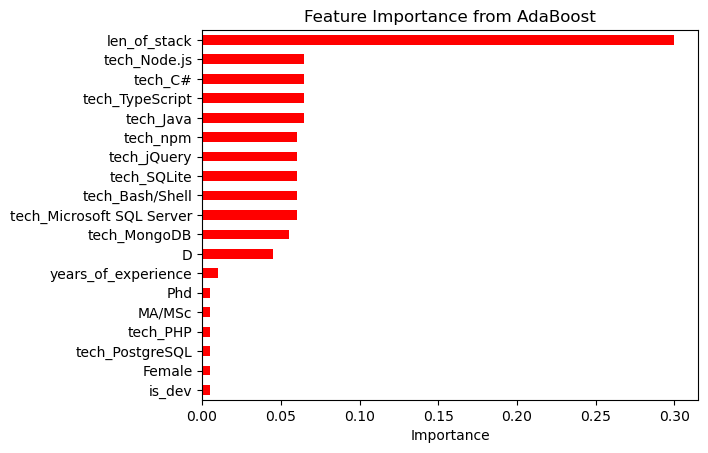

In [83]:
# Train the AdaBoost model with DT base estimator
model = AdaBoostClassifier(n_estimators=best_params_ada['n_estimators'], random_state=0)
model.fit(X_train, y_train)

# Create a DataFrame for feature importances
feats = pd.DataFrame(index=X_train.columns, data=model.feature_importances_, columns=['Importance'])

# Filter out features with non-zero importance
imp_feats = feats[feats['Importance']!=0]

# Sort features by importance
imp_feats_sorted = imp_feats.sort_values(by='Importance')
# Plot the sorted feature importances
imp_feats_sorted['Importance'].plot(kind='barh', color='r')
plt.xlabel('Importance')
plt.title('Feature Importance from AdaBoost')
plt.show()

Key Insights:<br>
1. Dominant Feature is `len_of_stack`: 0.300<br>
This feature has the highest importance score by a significant margin, indicating that the number of technologies or skills a candidate is familiar with is the most influential factor in predicting the hiring decision.
2. Important Technological Skills: 
    - `tech_Node.js`, `tech_C#`, `tech_TypeScript`, `tech_Java`: 0.065<br>
  These are among the most important technological skills in the model. They are highly valued in your hiring process, suggesting that experience with these technologies is a strong predictor of hiring.<br>
    - `tech_npm`, `tech_jQuery`, `tech_SQLite`, `tech_Bash/Shell`, `tech_Microsoft SQL Server`, `tech_MongoDB`: 0.055 - 0.060 <br>
  Other technical skills and databases that also contribute significantly to the hiring decision.
3. Moderately Important Features:<br>
    - `D`: 0.045
The feature D has moderate importance. If D is related to a specific skill or qualification, it shows that this attribute is somewhat relevant but not as critical as technical skills.
    - `years_of_experience`: 0.010
Experience plays a role, but it is not as important as specific technical skills or the overall length of the technology stack (`len_of_stack`).<br>
4. Less Important Features:<br>
    - `Phd`, `MA/MSc`: 0.005
Higher education (Ph.D. and Master's degree) has small impact on the hiring decision, according to this model. It suggests that the hiring process might prioritize practical skills over academic qualifications.<br>
    - `tech_PHP`, `tech_PostgreSQL`, `Female`, `is_dev`: 0.005<br>
These features are also less influential, indicating that while they are considered, they are not primary factors in the hiring decision.

In [84]:
# # Create a reduced DataFrame with only the features that have positive importance
# X_train_reduced = X_train[imp_feats.index]

In [85]:
# # Tune hyperparameters for X_reduced - All models
# params_knn_r, best_knn_r = tune_model_with_hyperparameters(KNeighborsClassifier(), knn_param_grid, X_train_reduced, y_train, scoring)
# params_lr_r, best_lr_r = tune_model_with_hyperparameters(LogisticRegression(), lr_param_grid, X_train_reduced, y_train, scoring)
# params_rfc_r, best_rfc_r = tune_model_with_hyperparameters(RandomForestClassifier(), rfc_param_grid, X_train_reduced, y_train, scoring)
# params_ada_r, best_ada_r = tune_model_with_hyperparameters(AdaBoostClassifier(), ada_param_grid, X_train_reduced, y_train, scoring)

# Tuning Results:
# # KNeighborsClassifier Reduced df Best Parameters: {'algorithm': 'auto', 'n_neighbors': 20}, Validation AUC = 0.948
# # LogisticRegression Reduced df Best Parameters: {'C': 100, 'max_iter': 250, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}, Validation AUC = 0.907
# # RandomForestClassifier Reduced df Best Parameters: {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 100, 'random_state': 0}, Validation AUC = 0.972
# # AdaBoostClassifier Reduced df Best Parameters: {'learning_rate': 1, 'n_estimators': 200, 'random_state': 0}, AUC = 0.983

To save time, I commented out the code for hyperparameter tuning on the reduced dataset. I decided not to use the reduced dataset because AdaBoost already focuses on important features by adjusting weights, and removing features didn’t improve performance. I chose to play it safe and stick with the full dataset.

---

## 4. Evaluation <a class="anchor" id="4"></a>
[Table of Contents](#0)

### 4.1 Cross-Validation

k-Fold cross-validation is a technique used to evaluate the performance of machine learning models. It works by dividing the dataset into k equally sized parts, or folds. The model is trained and evaluated k times, each time using a different fold as the validation set and the remaining folds as the training set.<br> 

In [86]:
# Define the number of folds for cross-validation
num_folds = 5
# Split df_val_split to X and y, df_val_split has 11093 rows × 140 columns
X_val = df_val_split.drop('label', axis = 1)
y_val = df_val_split['label']
# Combine X_train and X_val
X_processed = pd.concat([X_train, X_val], axis=0)
# Combine y_train and y_val
y_processed = pd.concat([y_train, y_val], axis=0)

After training the different classifier models, we can compare their performance on the validation data using metrics like ROC AUC with functions given below.
Here we run a classifier with cross-validation and plot the ROC curves fold-wise. Notice that the baseline to define the chance level (dashed ROC curve) is a classifier that would always predict the most frequent class.

In [87]:
def plot_roc_with_cv(model, model_name, X, y, n_splits=5, ax=None):
    cv = StratifiedKFold(n_splits=n_splits)
    # Lists to store True Positive Rates (TPRs) and AUC scores for each fold
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    if ax is None:
        fig, ax = plt.subplots()
    # Iterate over each fold in the cross-validation
    for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        # Train the model on the training data for this fold
        model.fit(X_train, y_train)
        # Predict probabilities for the test data of this fold
        y_prob = model.predict_proba(X_test)[:, 1]
        # Compute ROC curve and AUC score
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        # Plot the ROC curve for this fold
        ax.plot(fpr, tpr, lw=1, alpha=0.6, label='fold %d (AUC = %0.3f)' % (i, roc_auc))
        # Interpolate TPR values to match the mean_fpr for plotting mean ROC curve
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(roc_auc)
    
    # Plot a random guess line for reference
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8, label='Random Guess')
    
    # Compute the mean ROC curve and its AUC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    # Plot the mean ROC curve
    ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.3f)' % mean_auc, alpha=.8)
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title=f'ROC Curve - {model_name}')
    ax.legend(loc="lower right")
    # Set x-label and y-label for each subplot
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    return mean_fpr, mean_tpr, mean_auc

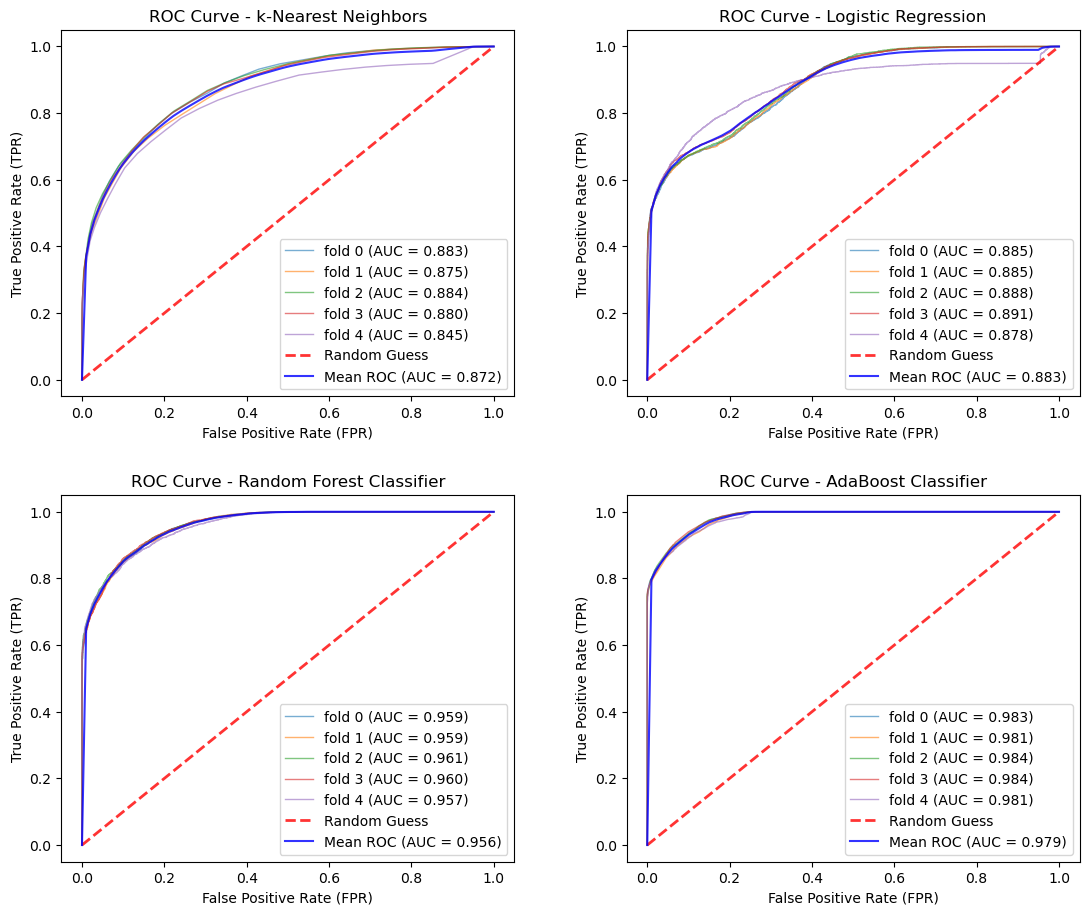

In [88]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=5.0)

# Evaluate and plot each model
mean_fpr_knn, mean_tpr_knn, mean_auc_knn = plot_roc_with_cv(best_knn, 'k-Nearest Neighbors', X_processed, y_processed, ax=axs[0, 0])
mean_fpr_lr, mean_tpr_lr, mean_auc_lr = plot_roc_with_cv(best_lr, 'Logistic Regression', X_processed, y_processed, ax=axs[0, 1])
mean_fpr_rfc, mean_tpr_rfc, mean_auc_rfc = plot_roc_with_cv(best_rfc, 'Random Forest Classifier', X_processed, y_processed, ax=axs[1, 0])
mean_fpr_ada, mean_tpr_ada, mean_auc_ada = plot_roc_with_cv(best_ada, 'AdaBoost Classifier', X_processed, y_processed, ax=axs[1, 1])

plt.show()

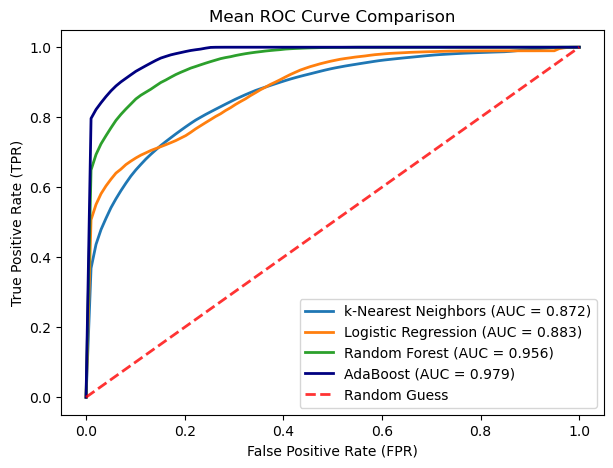

In [89]:
# Create a new figure for the combined mean ROC curve plot
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the mean ROC curves of all models on the same plot
ax.plot(mean_fpr_knn, mean_tpr_knn, label=f'k-Nearest Neighbors (AUC = {mean_auc_knn:.3f})', lw=2)
ax.plot(mean_fpr_lr, mean_tpr_lr, label=f'Logistic Regression (AUC = {mean_auc_lr:.3f})', lw=2)
ax.plot(mean_fpr_rfc, mean_tpr_rfc, label=f'Random Forest (AUC = {mean_auc_rfc:.3f})', lw=2)
ax.plot(mean_fpr_ada, mean_tpr_ada, label=f'AdaBoost (AUC = {mean_auc_ada:.3f})', lw=2, color='navy')

# Plot a random guess line for reference
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8, label='Random Guess')

# Set plot limits, labels, and title
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Mean ROC Curve Comparison")
ax.legend(loc="lower right")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.show()

The ROC curves and average AUC of the machine learning models. K-fold cross validation (k=5) was used to estimate and compare the
performance of different machine learning models. After five rounds of training/validation rotation, the average AUC was calculated.

The ROC (Receiver Operating Characteristic) curve is a graphical representation of a model's performance. It plots the False Positive Rate (FPR) on the x-axis and the True Positive Rate (TPR) on the y-axis. A curve that is closer to the top-left corner indicates a more accurate model.

The AUC (Area Under the Curve) is a key metric derived from the ROC curve. It measures the area under the ROC curve, with values ranging from 0 to 1. An AUC closer to 1 signifies better model performance.

The AUC ROC scores improve as the curves rise higher above the diagonal. Since, the **<span style="color:cyan;">Adaboost classifier</span>** has the best score for AUC ROC (0.979), we can choose it while moving forward.

Interpreting Results:
- Consistency Across Folds: Ideally, if the dataset is large and representative enough, the model's performance metrics (like AUC score) should be consistent across different folds. Significant variations between folds suggest that the model's performance could be affected by the particular subset of data used, rather than capturing general patterns.
- Signs of Overfitting: If the model performs exceptionally well on the training set but poorly on the validation set (across folds), it may indicate overfitting.

### 4.2 Train vs Validation Performance: 

In [90]:
# train model with best hyperparameter on train data
best_ada_model = best_ada.fit(X_train, y_train)

# Predictions for class labels
y_train_pred = best_ada_model.predict(X_train)
y_val_pred = best_ada_model.predict(X_val)

# Predictions for probabilities (needed for AUC)
y_train_prob = best_ada_model.predict_proba(X_train)[:, 1]  # Probabilities for the positive class
y_val_prob = best_ada_model.predict_proba(X_val)[:, 1]      # Probabilities for the positive class

metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall/Sensitivity": recall_score,
    "F1 Score": f1_score,
    "AUC": roc_auc_score
}

for name, metric in metrics.items():
    if name == "AUC":
        # AUC requires probabilities, not class labels
        train_metric = metric(y_train, y_train_prob)
        val_metric = metric(y_val, y_val_prob)
    else:
        # Other metrics use class labels
        train_metric = metric(y_train, y_train_pred)
        val_metric = metric(y_val, y_val_pred)
    
    print(f"{name} - Training: {train_metric:.4f}, Validation: {val_metric:.4f}")

Accuracy - Training: 0.9180, Validation: 0.9105
Precision - Training: 0.9187, Validation: 0.9189
Recall/Sensitivity - Training: 0.9294, Validation: 0.9138
F1 Score - Training: 0.9240, Validation: 0.9163
AUC - Training: 0.9835, Validation: 0.9809


- Accuracy: this means that the model correctly classified 91.08% of the instances.
- Precision: this means that when the model predicts that applicant got hired, it is correct 92.05% of the time.
- Recall: this means that the model correctly identified 91.25% of the applicants who got hired.
- F1: this is a measure of balance between precision and recall.
- There is a noticeable drop in recall, indicating that the model is slightly less effective at capturing true positives in the validation set compared to the training set.
- The F1 score is slightly lower in the validation set, reflecting the drop in recall.
- AUC: The results above shows a high AUC score for both the training set (0.9835) and the validation set (0.9809). The difference between the training and validation AUC is very small (0.9835 - 0.9809 = 0.0026). This small gap suggests that the model is not overfitting, as it performs similarly on both the training and validation datasets.<br>
The high validation AUC indicates that our model has strong generalization capabilities, meaning it is likely to perform well on unseen data.

Actions I've made to improve Generalization:
1. Cross-Validation: I've used k-fold cross-validation to ensure that the model is being evaluated on different subsets of the data, providing a better estimate of its ability to generalize.
2. Hyperparameter Tuning: I've tuned the model's hyperparameters to find the optimal balance between underfitting and overfitting with GridSearchCV with cross-validation.

#### Learning Curves - Adaboost Classifier

Plotting learning curves will help us see how the model's performance changes with different training set sizes. A significant gap between training and validation curves may indicate overfitting. By analyzing the learning curves, we can gain insights into the model's performance and identify steps to improve its ability to generalize.

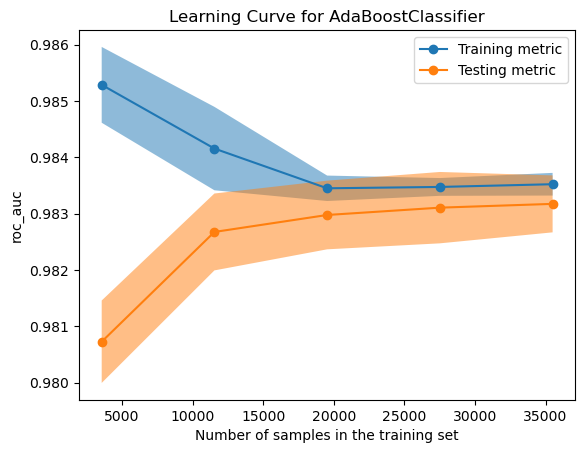

In [91]:
common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": 5,
    "scoring":"roc_auc",
    "score_type": "both",
    "n_jobs": (-1),
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "roc_auc",
}

LearningCurveDisplay.from_estimator(best_ada, **common_params)
plt.title("Learning Curve for AdaBoostClassifier")
plt.show()

The learning curve shows the roc_auc score for both the training and testing metrics as the number of training samples increases.<br>

The learning curve shape can be found in more complex datasets very often: the training score is very high when using few samples for training and decreases when increasing the number of samples, whereas the test score is very low at the beginning and then increases when adding samples. This suggests that the model is moving from an overfitting regime to a more generalized one, as it encounters more diverse data points.

Toward the end of the curve, the training and testing scores begin to converge. This convergence suggests that the model is reaching a balance between bias and variance, indicating that it is neither overfitting nor underfitting.

Both curves stabilize as the number of samples increases beyond a certain point. This indicates that adding more data beyond this point may not lead to significant improvements in model performance.

The AdaBoost model seems to perform well. The slight gap between the curves indicates that there’s still room for improvement, possibly through further tuning of the model.

### 4.3 Confusion Matrix - Adaboost Classifier

Confusion matrices are a powerful tool for evaluating the performance of classification models. They provide detailed insight into the types of errors the model is making.

In [92]:
# Function that return accuracy and custom confusion matrix of given dataset
def evaluate_model_c_matrix(model, X, y, name):
    # Predict the labels
    y_predicted = model.predict(X)
    # Compute the confusion matrix
    c_matrix = confusion_matrix(y, y_predicted)
    # Extract TN, FP, FN, TP
    tn, fp, fn, tp = c_matrix.ravel()
    # Rearrange the confusion matrix
    c_matrix_display = np.array([[tp, fp], [fn, tn]])
    # Calculate accuracy
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    print(f"{name} Dataset accuracy is", accuracy)
    # plot custom confusion matrix
    fig, ax = plt.subplots()
    ConfusionMatrixDisplay(confusion_matrix=c_matrix_display, display_labels=[1, 0]).plot(cmap='Blues', ax=ax)
    plt.title(f"Confusion Matrix - {name} Set")
    ax.set_ylabel('Predicted label')
    ax.set_xlabel('Actual label')
    plt.show()
    return

Validation Dataset accuracy is 0.9104840890651762


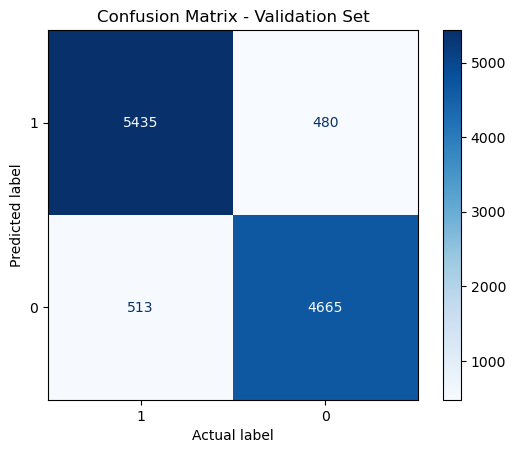

In [93]:
# Confusion matrix - Validation Data
evaluate_model_c_matrix(best_ada_model, X_val, y_val, 'Validation')

Interpreting the validation confusion matrix:
There is 11,093 samples in validation data set.
- True Positives (TP = 5435): These are the applicants who were correctly identified as hired by the model. The high number of TPs indicates that the model is effective at identifying candidates who should be hired. These are the number of cases where the model correctly identifies an applicant as hired. High TP indicates that the model is good at identifying applicants who will be hired.
- True Negatives (TN = 4665): These are the applicants who were correctly identified as not hired. A high TN count shows that the model is also good at correctly rejecting applicants who should not be hired. These are the number of cases where the model correctly identifies an applicant as not hired. High TN indicates that the model is good at identifying applicants who will not be hired.
- False Positives (FP = 480): These are the applicants who were incorrectly identified as hired by the model, but in reality, they were not hired.<br>
In an HR context, FPs might lead to unnecessary further screening or consideration of candidates who aren't a good fit. These are the number of cases where the model incorrectly identifies an applicant as hired (Type I error).
- False Negatives (FN = 513): These are the applicants who were incorrectly identified as not hired by the model, but they were actually hired.<br>
FNs can be particularly concerning as they represent missed opportunities, potentially leading to overlooking strong candidates. These are the number of cases where the model incorrectly identifies an applicant as not hired (Type II error).

Balancing Hiring Decisions:
The confusion matrix reveals that the model has a relatively low number of FPs and FNs, which is a positive sign. However, the impact of these errors should be considered in the HR context.
FPs may lead to extra costs or time spent on further evaluation of less suitable candidates. Conversely, FNs might mean losing out on talent, which could be more detrimental to the company.

The confusion matrix is an essential tool for evaluating the model, It helps us understand the trade-offs between different types of errors and make informed decisions on how to adjust the model to align with business objectives.
By carefully analyzing the confusion matrix, we can refine the model to better meet the specific goals of the HR department, whether that's minimizing missed hires or reducing unnecessary follow-ups on unsuitable candidates.

---

## 5. Part E: Deployment/Prediction <a class="anchor" id="5"></a>
[Table of Contents](#0)

In [94]:
# Combine training and validation sets for final training
X_final = pd.concat([X_train, X_val], axis=0)
y_final = pd.concat([y_train, y_val], axis=0)

In [95]:
# Train model on entire df_train (including validation set)
final_adaboost_model = best_ada_model.fit(X_final, y_final)

In [96]:
# Make predictions on the test dataset
# Get prediction probabilities for the positive class
test_probabilities = final_adaboost_model.predict_proba(df_test_processed)[:, 1]  

# Create a new DataFrame with 'ID' and 'predict_proba' columns
result_df = pd.DataFrame({'ID': ID_values, 'predict_proba': test_probabilities})

# Save the result DataFrame to a new CSV file
result_df.to_csv('results_19.csv', index=False)

In [97]:
run_total = time.perf_counter() - start_total
print('Total running time was {:.2f} minutes.'.format(run_total/60))

Total running time was 47.99 minutes.


---

## 6. Part F: Self-Learning <a class="anchor" id="6"></a>
[Table of Contents](#0)

Tools/Techniques that we haven't seen in class:
1. *Winsorization* for outliers treatment
In section 2.6, I've implemented Winsorization to address outliers in the dataset.<br>
Winsorization replaces extreme values with more moderate ones by setting data points beyond a certain percentile to that percentile's value. <br>
This method was particularly effective because our continuous features were skewed, and Winsorization doesn't require the data to be normally distributed. By applying this technique, we ensured that our AdaBoost classifier was less influenced by outliers, resulting in a more robust model without any loss of data.
2. Chi-Square Test
In section 
The Chi-Square Test is a statistical method used to determine whether there is a significant association between two categorical variables. In section 1.3 I implemented this test on the features `label` and `country` to see if country is valuable feature.
The results show extremely low p-value, which indicates that there is a statistically significant association between the country feature and the label. This means that the country feature is not independent of the label and has a significant impact on the outcome. That is the reason I decided to keep it in the model rather than remove it completely. 

---

## 7. Final Part: Pipeline <a class="anchor" id="7"></a>
[Table of Contents](#0)

In a machine learning project building a pipeline is essential. The pipeline organizes the workflow into clear steps, so we could run only the cells below in order to get prediction.

In [102]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats.mstats import winsorize
from scipy.stats import skew

%matplotlib inline
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [103]:
# Initialize necessary functions for Pipeline
# Function to create feature len_of_stack as number of stack technologies
def count_stack_technologies(df):
    # Function to count number of technologies
    def count_technologies(stack):
        if isinstance(stack, str):
            return len(stack.split(';'))
        else:
            return 0
    # Apply count_technologies function to each row
    df['len_of_stack'] = df['stack_experience'].apply(count_technologies)
    return df

# Function to convert stack_experience column to multiple columns
def expand_stack_experience(df, column, prefix='tech_'):
    # Ensure all entries are strings and handle NaNs
    df[column] = df[column].fillna('').astype(str)
    
    # Split the stack_experience column and create a list of all unique technologies
    technologies = set()
    df[column].str.split(';').apply(technologies.update)
    technologies = sorted(technologies)  # Sort for consistent column order
    
    # Initialize columns with zeros, using a prefix to avoid conflicts
    for tech in technologies:
        df[prefix + tech] = 0
    
    # Update the DataFrame with ones where the technology is present
    for idx, row in df.iterrows():
        for tech in row[column].split(';'):
            if tech:
                df.at[idx, prefix + tech] = 1
    
    # Drop the original stack_experience column
    df.drop(columns=[column], inplace=True)
    return df

# Function to create binary feature for 'usa' and remove the original 'country' feature
def create_usa_feature(df, country_column='country'):
    # Create binary 'usa' feature
    df['usa'] = df[country_column].apply(lambda x: 1 if x == 'United States of America' else 0)
    # Drop the original 'country' column
    df.drop(country_column, axis=1, inplace=True)
    return df

# Function that perform one-hot encoding using Pandas and remove the original feature
def encode_categorical_variables(df, column_name):
    mapped_variables = pd.get_dummies(df[column_name], dtype=int) # Generate dummy variables
    df_encoded = pd.concat((df, mapped_variables), axis=1) # Concatenate the dummy variables with the original DataFrame
    df_encoded = df_encoded.drop([column_name], axis=1) # Drop the original categorical column
    return df_encoded

# Function that maps each two-classes features into classes 1 or 0
def map_binary_features(df):
    # Define the binary mappings
    binary_mappings = {
        'worked_in_the_past': {'T': 1, 'F': 0},
        'age_group': {'young': 1, 'old': 0},
        'disability': {'Yes': 1, 'No': 0},
        'is_dev': {'developer': 1, 'non-developer': 0},
        'mental_issues': {'Yes': 1, 'No': 0}
    }
    
    # Apply the mappings to the DataFrame
    for feature, mapping in binary_mappings.items():
        if feature in df.columns:
            df[feature] = df[feature].map(mapping)
    
    return df

# Function to find all binary features in the DataFrame excluding specific columns
def find_binary_features(df, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []
    binary_features = [col for col in df.columns if col not in exclude_columns and df[col].nunique() == 2 and set(df[col].unique()).issubset({0, 1})]
    return binary_features

# Function that performs imputation based on the train dataset
def impute_missing_values(df_train, curr_df, numerical_cols, binary_cols, skewed_threshold=0.5):
    if numerical_cols is not None:
        # Determine skewness for numerical columns in the train set
        skewed_features = df_train[numerical_cols].apply(lambda x: skew(x.dropna()))
        skewed_features = skewed_features[abs(skewed_features) > skewed_threshold].index
        
        # Separate columns into skewed and non-skewed
        non_skewed_cols = [col for col in numerical_cols if col not in skewed_features]
        skewed_cols = [col for col in numerical_cols if col in skewed_features]
        
        # Impute mean for non-skewed features
        if non_skewed_cols:
            imputer_mean = SimpleImputer(strategy='mean')
            imputer_mean.fit(df_train[non_skewed_cols])
            curr_df[non_skewed_cols] = imputer_mean.transform(curr_df[non_skewed_cols])
        
        # Impute median for skewed features
        if skewed_cols:
            imputer_median = SimpleImputer(strategy='median')
            imputer_median.fit(df_train[skewed_cols])
            curr_df[skewed_cols] = imputer_median.transform(curr_df[skewed_cols])

    # Impute missing values in binary columns using the most frequent values from the train set
    if binary_cols is not None:
        imputer_binary = SimpleImputer(strategy='most_frequent')
        imputer_binary.fit(df_train[binary_cols])
        curr_df[binary_cols] = imputer_binary.transform(curr_df[binary_cols])

    return curr_df

# Function that performs standardization to numerical values in df
def scale_dataframe(df, scaler, fit_scaler=False, label_col='label', binary_cols=[]):
    # Identify the numeric columns, excluding the binary columns and the label column
    numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(binary_cols)
    
    # Drop the label column if it exists in the DataFrame
    if label_col in numeric_cols:
        numeric_cols = numeric_cols.drop(label_col)
    
    # Fit the scaler on the numeric columns if fit_scaler is True
    if fit_scaler:
        scaler.fit(df[numeric_cols])
    
    # Scale the numeric columns using the provided scaler
    scaled_data = scaler.transform(df[numeric_cols])
    df_scaled = df.copy()
    df_scaled[numeric_cols] = scaled_data
    
    return df_scaled

# Function that performs grid search to tune hyperparameters
def tune_model_with_hyperparameters(model, param_grid, X_train, y_train, scoring):
    cv_inner = 5 # use StratifiedKFold(n_splits=5)
    tune_model = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=cv_inner, return_train_score=True, n_jobs=-1)
    tune_model.fit(X_train, y_train)

    best_params = tune_model.best_params_
    print('Best Parameters:', best_params)
    print("Training score mean: {:.3f}".format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]))
    print("Test score mean: {:.3f}".format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]))
    return best_params, tune_model.best_estimator_

def preprocess_data(df):

    # Apply log transformation
    if 'prev_salary' in df.columns:
        df['prev_salary'] = np.log(df['prev_salary'].replace(0, np.nan))  # Replace 0 to avoid log(0), which is undefined

    df = count_stack_technologies(df)  # Create 'len_of_stack' feature
    df = expand_stack_experience(df, 'stack_experience')  # Create dummies out of each technology in stack_experience 
    df.drop(columns=['tech_'], inplace=True)  # Remove the column representing NaN values in stack_experience feature
    df = create_usa_feature(df)  # Create binary feature 'usa' and remove the 'country' feature
    
    # Encode categorical variables if needed
    categorical_features = ['sex', 'education', 'C']
    for feature in categorical_features:
        df = encode_categorical_variables(df, feature)
    
    # Drop unnecessary features
    drop_features = ['Other', 'other', 'ca']
    df.drop(columns=drop_features, axis=1, inplace=True)
    # Map binary features
    df = map_binary_features(df)
    # Remove B and ID features
    df.drop(columns=['ID', 'B'], inplace=True)  
    
    return df

In [106]:
def pipeline(df_train, df_test):
    # Preprocess Train Data
    df_train = preprocess_data(df_train)
    
    numerical_cols = ['years_of_experience', 'A', 'D', 'prev_salary', 'len_of_stack']
    binary_cols = ['worked_in_the_past', 'age_group', 'disability', 'is_dev', 'mental_issues']
    binary_features = find_binary_features(df_train, ['label'])
    binary_cols = list(set(binary_cols + binary_features))
    
    # Separate features and label
    X = df_train.drop(columns='label')
    y = df_train['label']
    
    # Split the train set to train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    # Combine features and label for train and validation sets
    df_train_split = pd.concat([X_train, y_train], axis=1)
    df_val_split = pd.concat([X_val, y_val], axis=1)

    # Remove Outliers, Impute Missing Data, and Normalize Train Data
    df_train_split['len_of_stack'] = winsorize(df_train_split['len_of_stack'], limits=(0.05, 0.05))
    df_train_processed = impute_missing_values(df_train_split, df_train_split, numerical_cols, binary_cols)
    scaler = StandardScaler()
    df_train_processed = scale_dataframe(df_train_processed, scaler, fit_scaler=True, label_col='label', binary_cols=binary_cols)

    # Impute Missing Data and Normalize Validation Data
    df_val_split  = impute_missing_values(df_train_processed, df_val_split, numerical_cols, binary_cols)
    df_val_split  = scale_dataframe(df_val_split, scaler, fit_scaler=False, label_col='label', binary_cols=binary_cols)

    # Preprocess Test Data
    ID_values = df_test['ID']
    df_test_processed = preprocess_data(df_test)
    df_test_processed = impute_missing_values(df_train_processed, df_test_processed, numerical_cols, binary_cols)
    df_test_processed = scale_dataframe(df_test_processed, scaler, fit_scaler=False, label_col='label', binary_cols=binary_cols)

    # Model Training and Evaluation
    X_train = df_train_processed.drop('label', axis=1)
    y_train = df_train_processed['label']
    X_val = df_val_split.drop('label', axis=1)
    y_val = df_val_split['label']

    # Model Training and Hyperparameter Tuning
    ada = AdaBoostClassifier()
    ada_param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'random_state': [0]
    }
    best_params_ada, best_ada = tune_model_with_hyperparameters(ada, ada_param_grid, X_train, y_train, scoring='roc_auc')
    
    # Train Final Model
    best_ada_model = AdaBoostClassifier(**best_params_ada)
    best_ada_model.fit(X_train, y_train)

    # Final Model Training on Combined Train and Validation Data
    X_final = pd.concat([X_train, X_val], axis=0)
    y_final = pd.concat([y_train, y_val], axis=0)
    final_adaboost = best_ada_model.fit(X_final, y_final)

    # Predict on the Test Data
    test_probabilities = final_adaboost.predict_proba(df_test_processed)[:, 1]
    result_df = pd.DataFrame({'ID': ID_values, 'predict_proba': test_probabilities})
    result_df.to_csv('results_19.csv', index=False)

    return

In [107]:
# read datasets from csv's files
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
pipeline(df_train, df_test)

Best Parameters: {'learning_rate': 1, 'n_estimators': 200, 'random_state': 0}
Training score mean: 0.984
Test score mean: 0.983
